In [44]:
# Import Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from pathlib import Path
from ast import literal_eval
%matplotlib inline
import itertools
import ast
import scipy
from scipy import stats
from geopy.distance import distance
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

In [2]:
#data_folder = Path("Data/")
final_data  = pd.read_csv("exploded_dataset.csv", skip_blank_lines=True, index_col=None, header='infer')
#final_data = pd.read_excel('exploded_dataset.csv', index_col=0)  


In [3]:
final_data

,Unnamed: 0,level_0,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,0,0,138e0de80f19742f475087d5bab348345f4328eb,18.642327,0,0,0,3,0,0,...,0,0,0,0,0,0,3,0,0,0
1,1,0,138e0de80f19742f475087d5bab348345f4328eb,18.654991,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,138e0de80f19742f475087d5bab348345f4328eb,18.670971,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,138e0de80f19742f475087d5bab348345f4328eb,18.642116,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0
4,4,0,138e0de80f19742f475087d5bab348345f4328eb,18.781096,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74383,74383,38,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.578915,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0
74384,74384,38,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.579515,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74385,74385,38,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.581270,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
74386,74386,38,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.581270,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
final_data = final_data.drop('Unnamed: 0',axis= 1)


In [5]:
final_data = final_data.drop('level_0',axis= 1)

In [6]:
final_data

,index,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,138e0de80f19742f475087d5bab348345f4328eb,18.642327,0,0,0,3,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
1,138e0de80f19742f475087d5bab348345f4328eb,18.654991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,138e0de80f19742f475087d5bab348345f4328eb,18.670971,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,138e0de80f19742f475087d5bab348345f4328eb,18.642116,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,138e0de80f19742f475087d5bab348345f4328eb,18.781096,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74383,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.578915,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74384,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.579515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74385,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.581270,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74386,138e4270a54e586c43d09b9981d0b85cd56e28eb,587.581270,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#here we can see how much participants are contributing to the final dataset with the lenght of all rows for each participants (some of them not so many taps)
# we cn define here the total phone sessions of each participants (= how many rows belong to each part)
lenght_dataframe_parts = final_data.groupby(by='index').count()
lenght_dataframe_parts

,home_distance,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
index,,,,,,,,,,,,,,,,,,,,,
138e00cbba7d2ffd4529a40085503e72a50f28eb,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
138e0597ea9b57894f38aee74a16a0186c1528eb,734,734,734,734,734,734,734,734,734,734,...,734,734,734,734,734,734,734,734,734,734
138e0de80f19742f475087d5bab348345f4328eb,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
138e0f9168ca102c4e0eb46b4815c94cc9cf28eb,3694,3694,3694,3694,3694,3694,3694,3694,3694,3694,...,3694,3694,3694,3694,3694,3694,3694,3694,3694,3694
138e16263a067d1a45c0a6c0a8e494e939f828eb,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,...,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
138e19840f04b4e548058277ba44ff1e192a28eb,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
138e1b37bd14340542c5a02724539c59c99e28eb,515,515,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
138e35ce1a3df38d438bbac4a7d76b8a25e528eb,1343,1343,1343,1343,1343,1343,1343,1343,1343,1343,...,1343,1343,1343,1343,1343,1343,1343,1343,1343,1343
138e364b7d0241a44f25bc054d05f7c3e16828eb,4891,4891,4891,4891,4891,4891,4891,4891,4891,4891,...,4891,4891,4891,4891,4891,4891,4891,4891,4891,4891


In [23]:
lenght_dataframe_parts= lenght_dataframe_parts.reset_index()

In [29]:
# Plotting the contribution of each participant to the final dataset
x= list(lenght_dataframe_parts['maps_taps'])
y = list(lenght_dataframe_parts['index'])

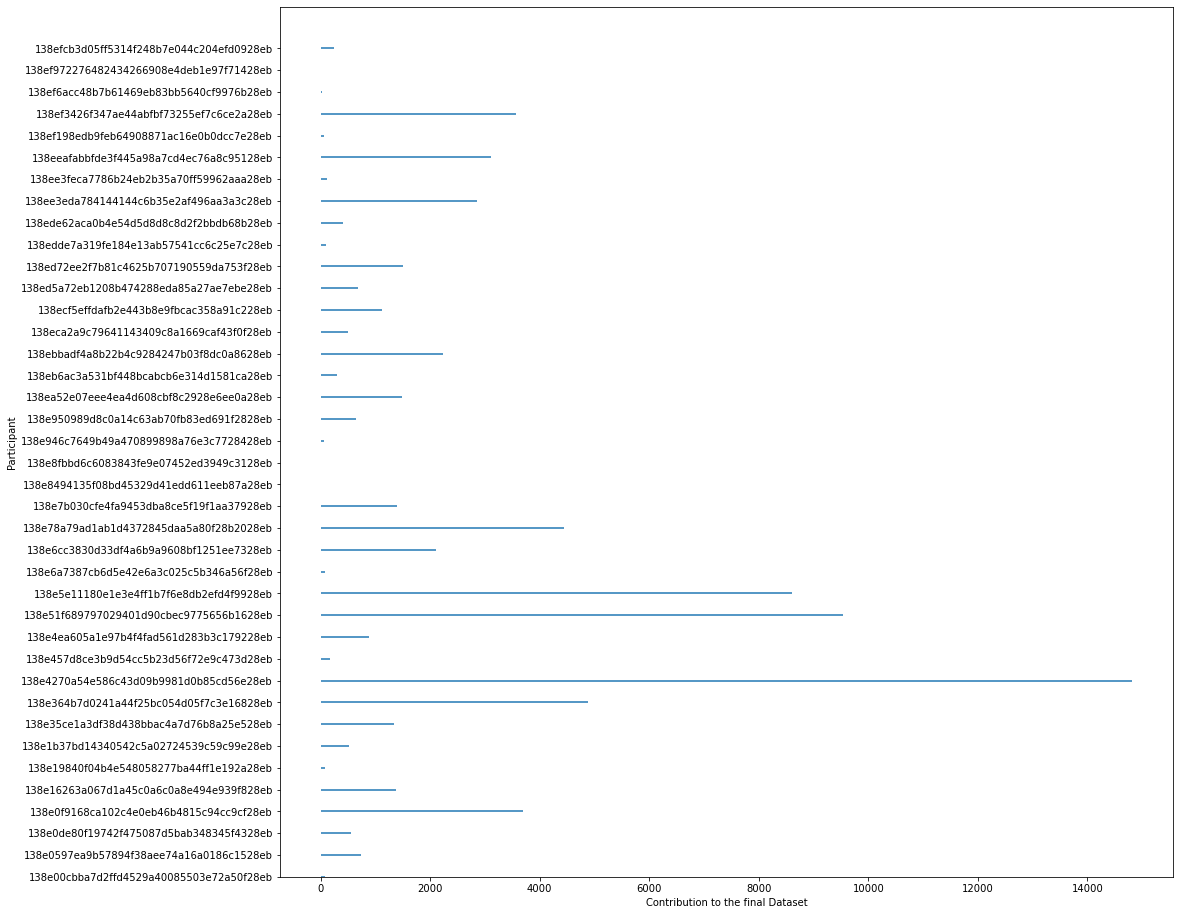

In [48]:
figure(figsize=(16, 16))
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Contribution to the final Dataset')
plt.ylabel('Participant')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()

# where not readable the contribution is less then 10 (e.g. 3, 7, 10)

In [131]:
# Here I actually summed all the the taps of the same column per participant to see how many taps in total for that categories they have
# N.B.  not relevant the sum of the home_distances so i did not put it in df
summed_taps_part = final_data.groupby(by='index').sum().drop(columns = 'home_distance')
#summed_taps_part =summed_taps_part.reset_index()
summed_taps_part

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
index,,,,,,,,,,,,,,,,,,,,,
138e00cbba7d2ffd4529a40085503e72a50f28eb,9,70,5,2823,55,2858,1,1640,0,17,...,0,0,0,0,5833,5,6,0,0,0
138e0597ea9b57894f38aee74a16a0186c1528eb,261,53,0,0,180,24487,0,4812,12,432,...,356,211,0,1932,38584,40,0,9,0,0
138e0de80f19742f475087d5bab348345f4328eb,44,219,702,1744,1098,7484,353,8793,3034,550,...,0,0,1,185,0,166,2345,88,54,197
138e0f9168ca102c4e0eb46b4815c94cc9cf28eb,1462,4407,44829,12919,7285,164825,0,1127,1704,4969,...,0,46,14,347,0,0,535,156,405,1
138e16263a067d1a45c0a6c0a8e494e939f828eb,318,2217,454,3610,806,51203,3418,29390,104,1167,...,242,428,6520,1336,0,56,108,34,24,0
138e19840f04b4e548058277ba44ff1e192a28eb,33,0,20,0,0,2468,133,940,99,0,...,0,53,0,0,461,0,0,0,0,11
138e1b37bd14340542c5a02724539c59c99e28eb,134,255,197,2378,753,9026,1697,11882,120,56,...,1289,36,2296,748,198,20,464,19,0,0
138e35ce1a3df38d438bbac4a7d76b8a25e528eb,1023,1669,4842,656,719,44259,9500,0,642,175,...,1117,0,318,726,0,392,38,57,61,315
138e364b7d0241a44f25bc054d05f7c3e16828eb,113969,12303,6119,15181,36091,95742,208976,204345,956,3670,...,5862,1964,17,44517,0,1416,13,5855,45,10275


In [99]:
without_ind = summed_taps_part.drop(columns=['index'])
without_ind

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,9,70,5,2823,55,2858,1,1640,0,17,...,0,0,0,0,5833,5,6,0,0,0
1,261,53,0,0,180,24487,0,4812,12,432,...,356,211,0,1932,38584,40,0,9,0,0
2,44,219,702,1744,1098,7484,353,8793,3034,550,...,0,0,1,185,0,166,2345,88,54,197
3,1462,4407,44829,12919,7285,164825,0,1127,1704,4969,...,0,46,14,347,0,0,535,156,405,1
4,318,2217,454,3610,806,51203,3418,29390,104,1167,...,242,428,6520,1336,0,56,108,34,24,0
5,33,0,20,0,0,2468,133,940,99,0,...,0,53,0,0,461,0,0,0,0,11
6,134,255,197,2378,753,9026,1697,11882,120,56,...,1289,36,2296,748,198,20,464,19,0,0
7,1023,1669,4842,656,719,44259,9500,0,642,175,...,1117,0,318,726,0,392,38,57,61,315
8,113969,12303,6119,15181,36091,95742,208976,204345,956,3670,...,5862,1964,17,44517,0,1416,13,5855,45,10275
9,3561,17953,10777,0,144601,368309,45,4,940,14487,...,134441,20124,17,2800,444073,0,59270,1956,1441,238


/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

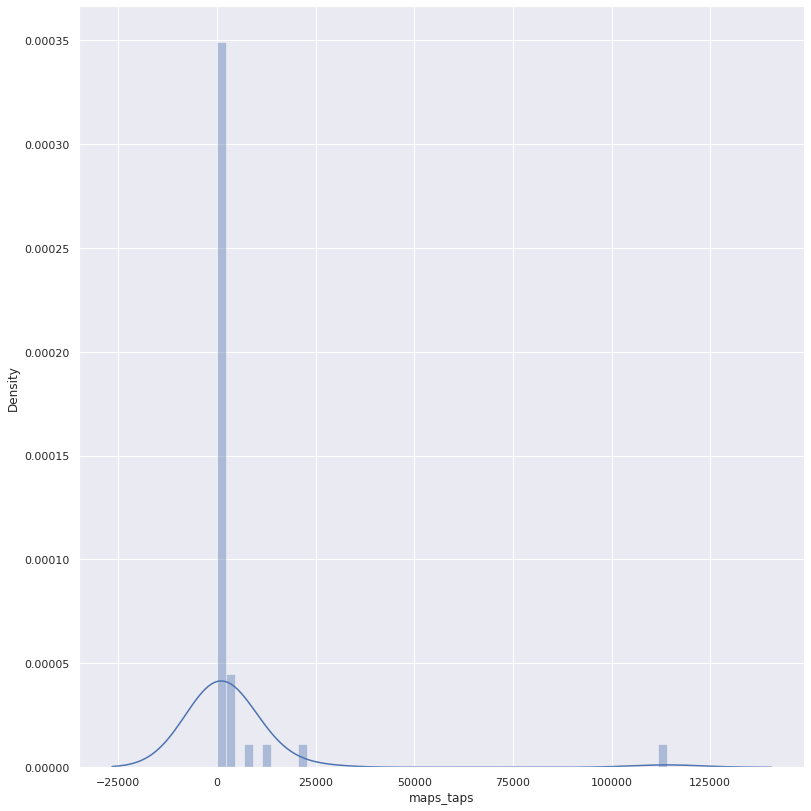

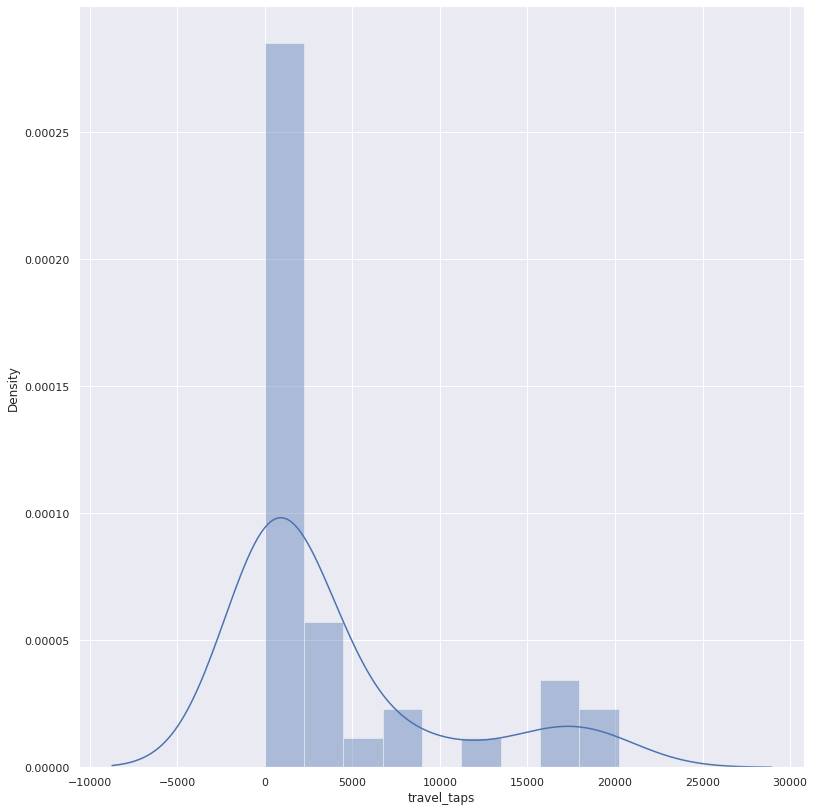

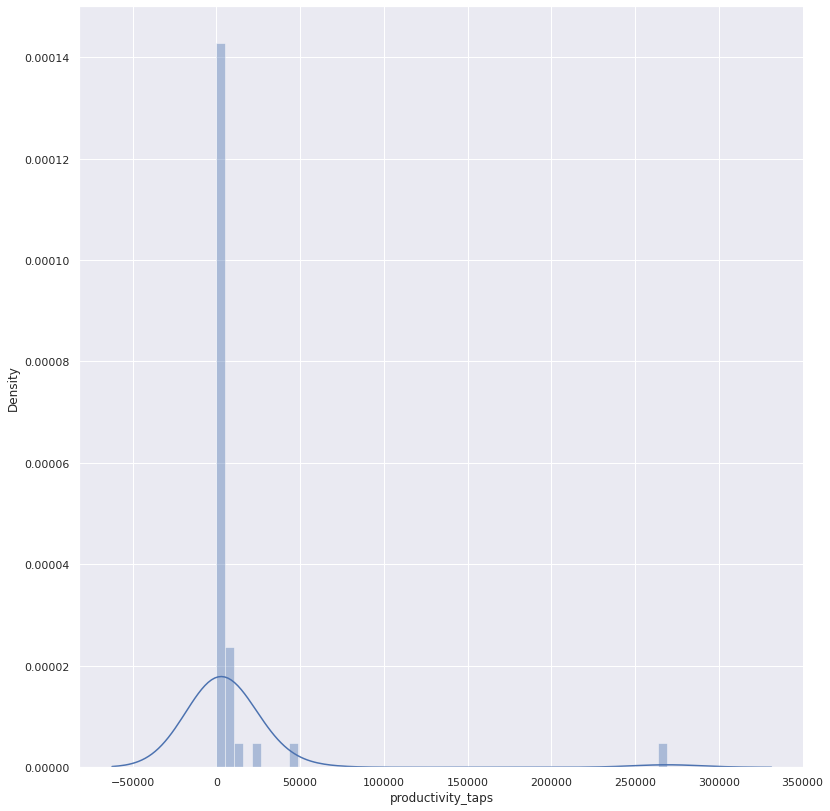

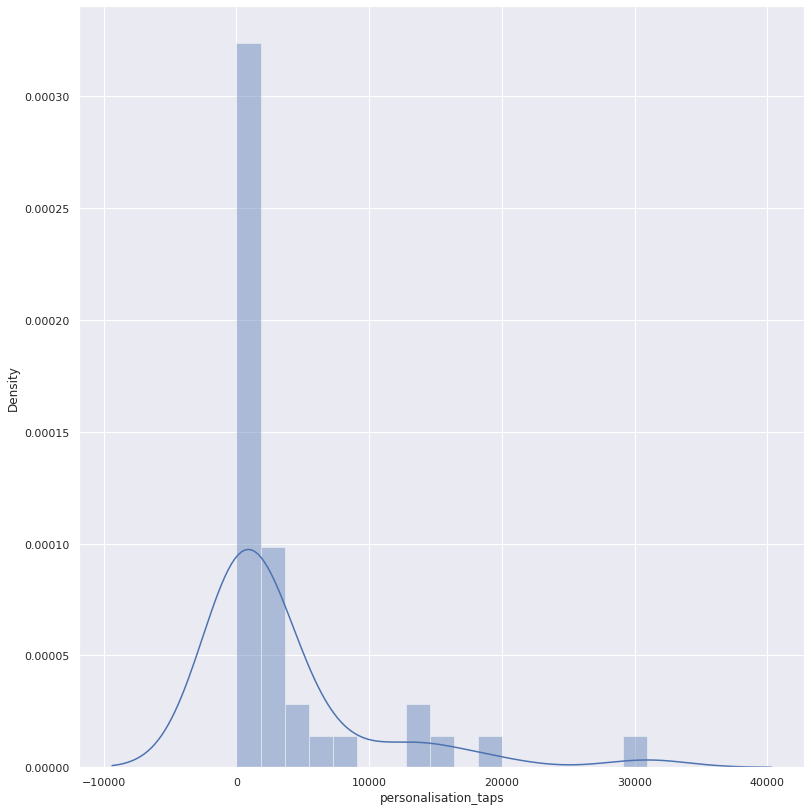

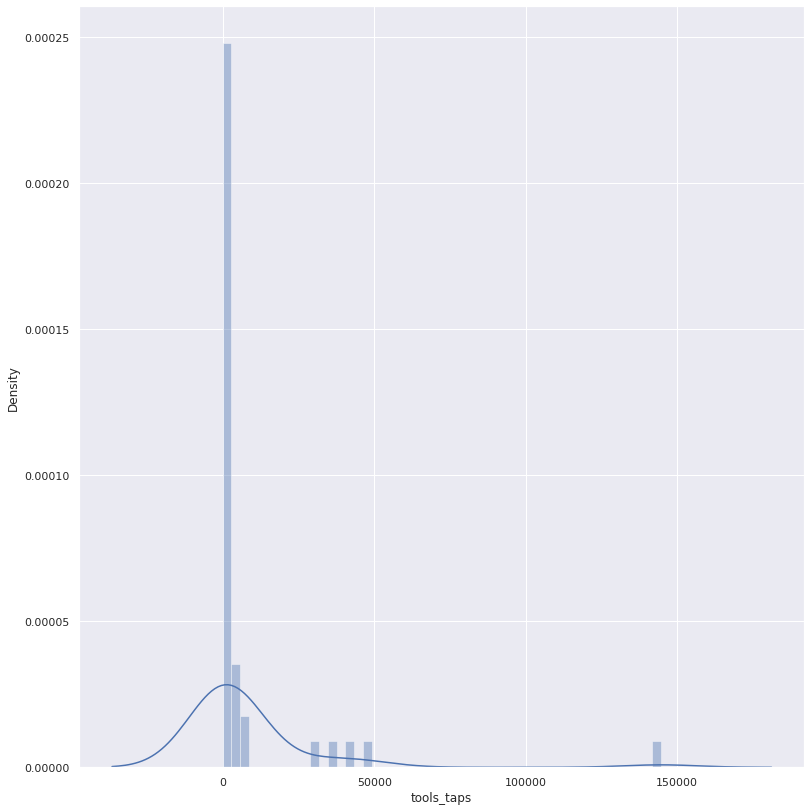

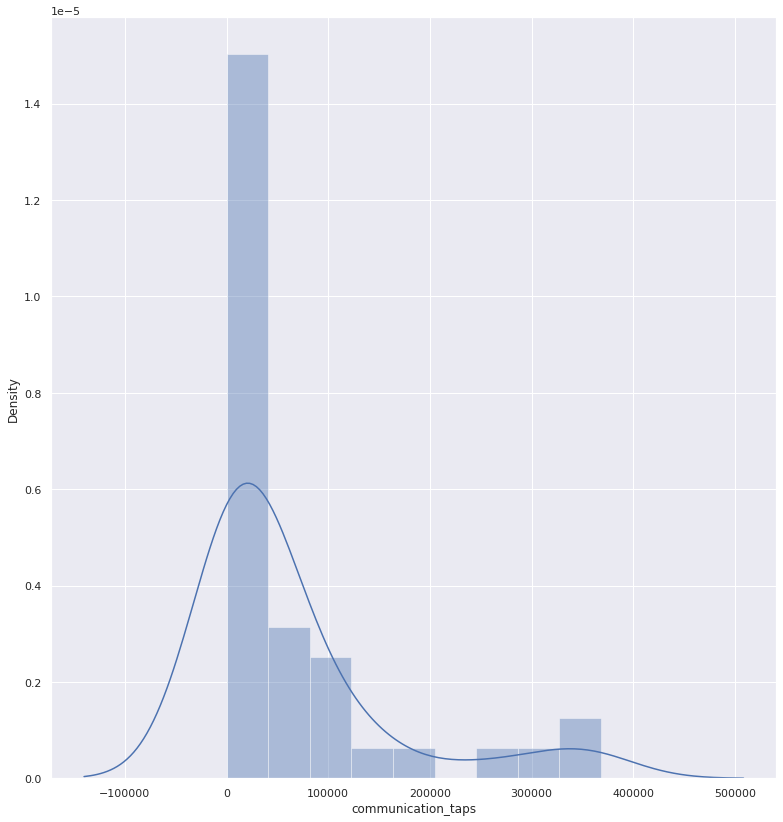

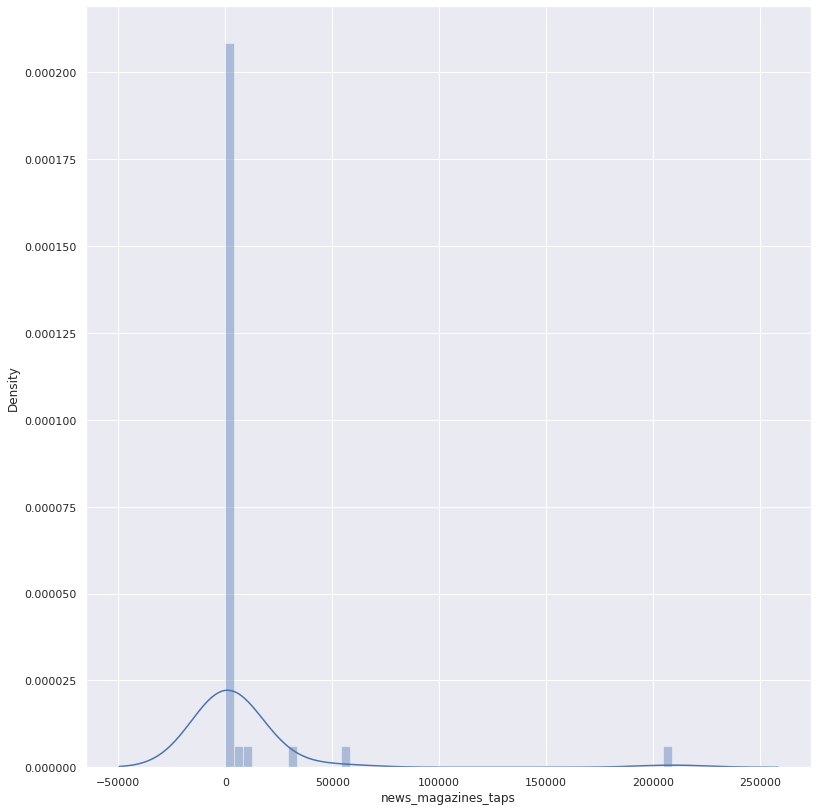

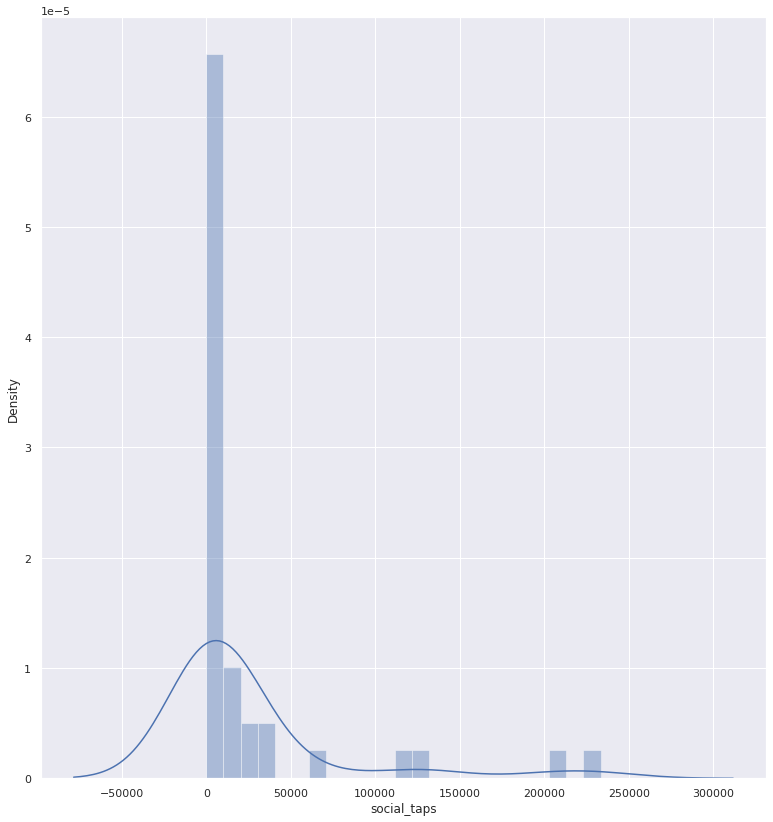

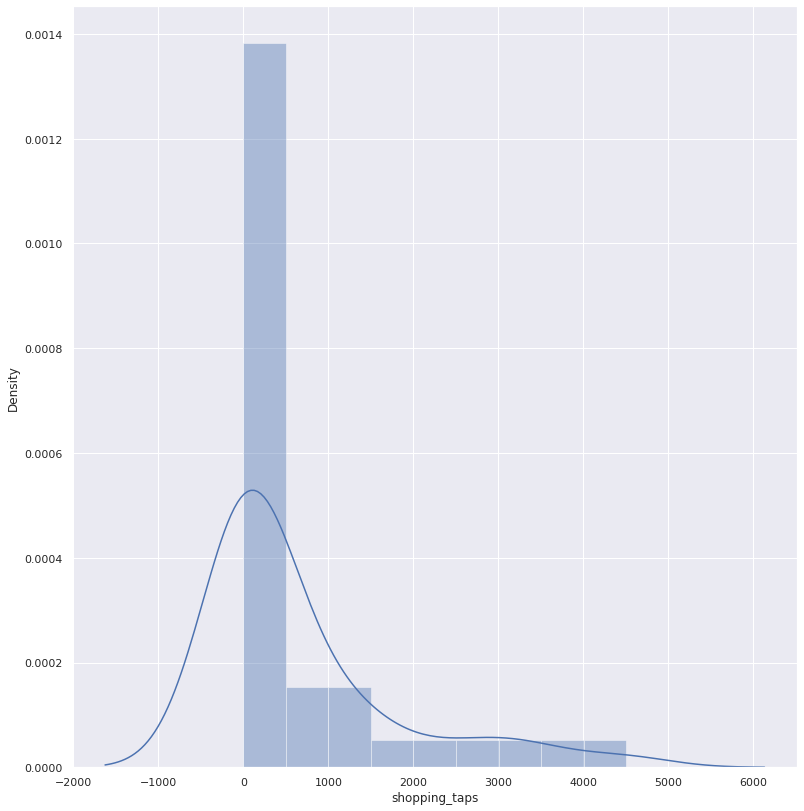

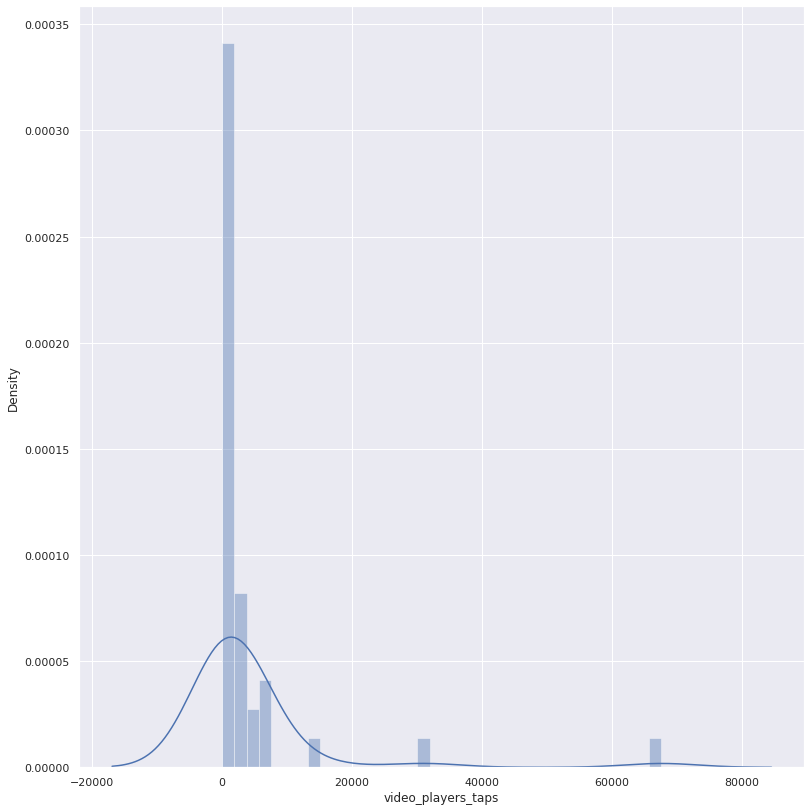

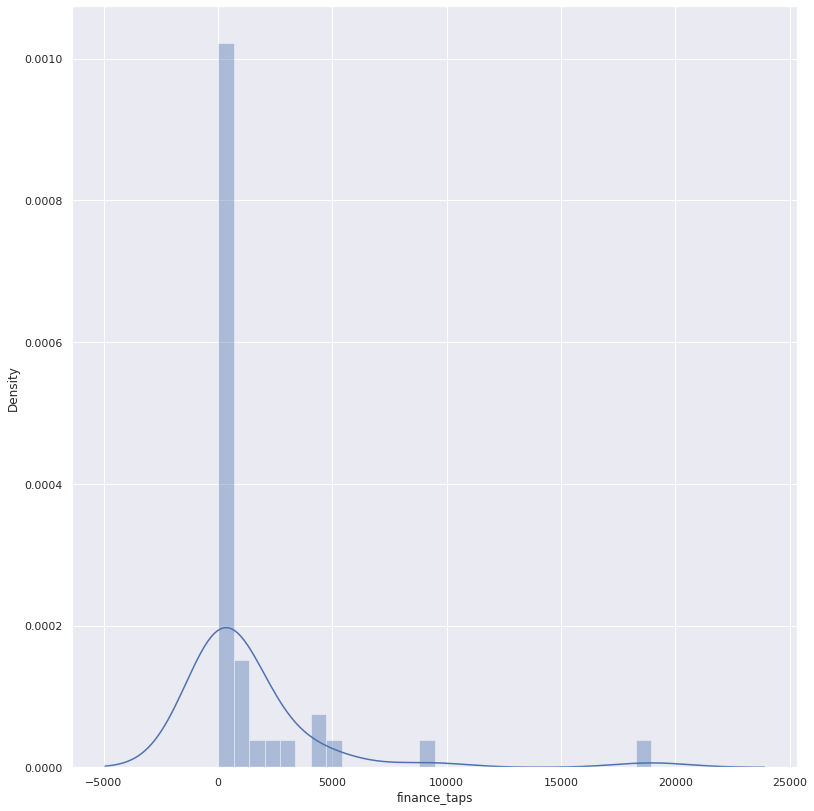

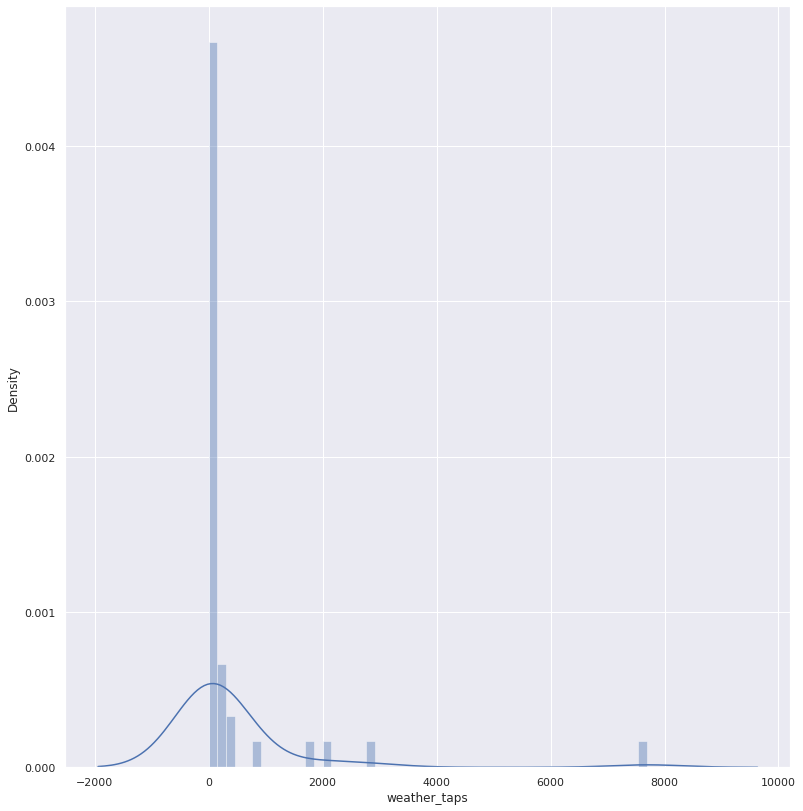

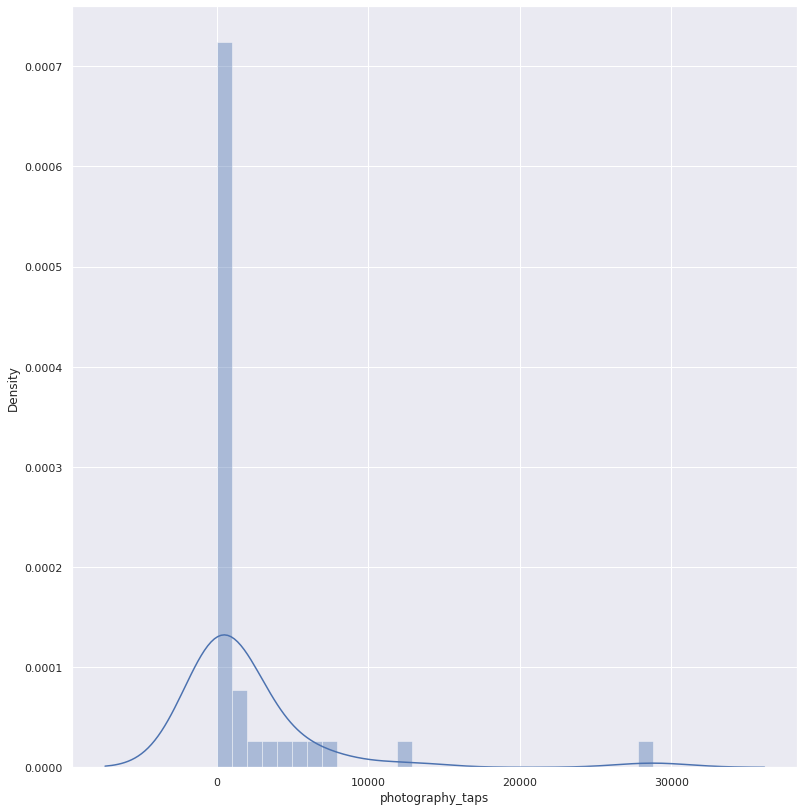

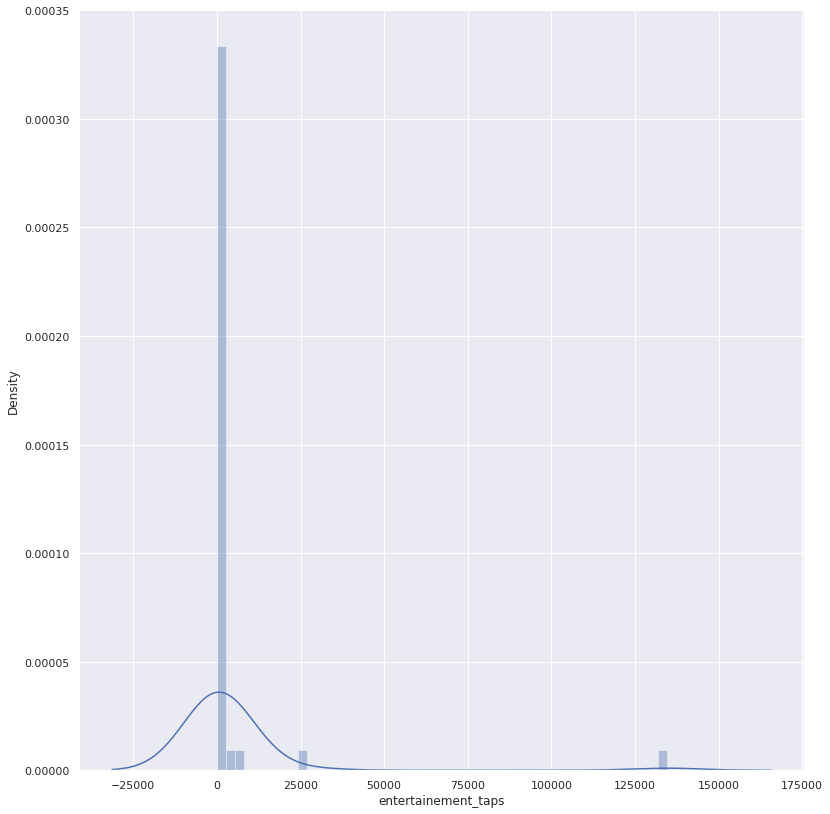

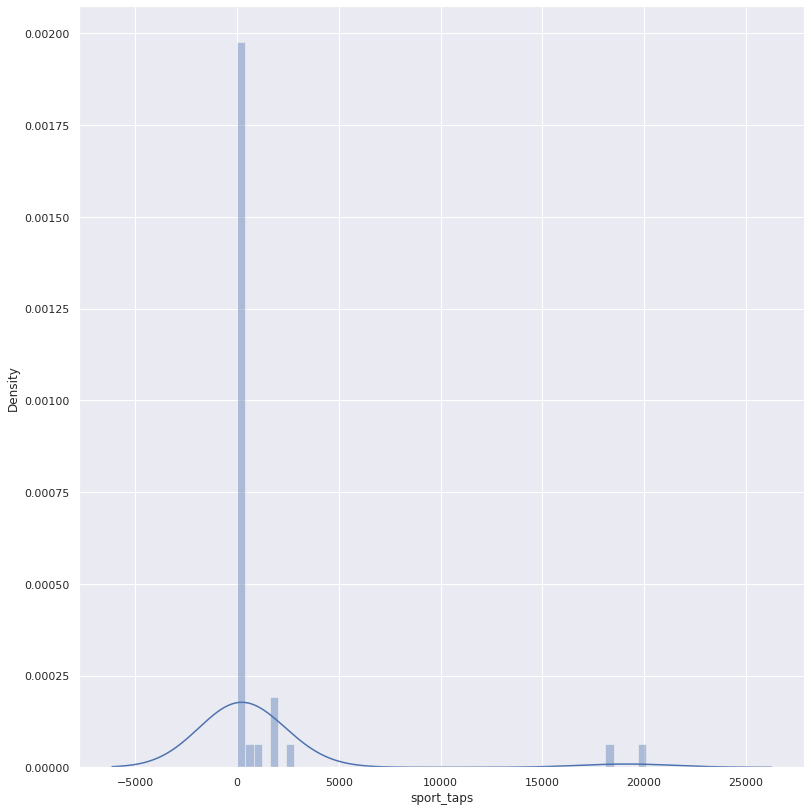

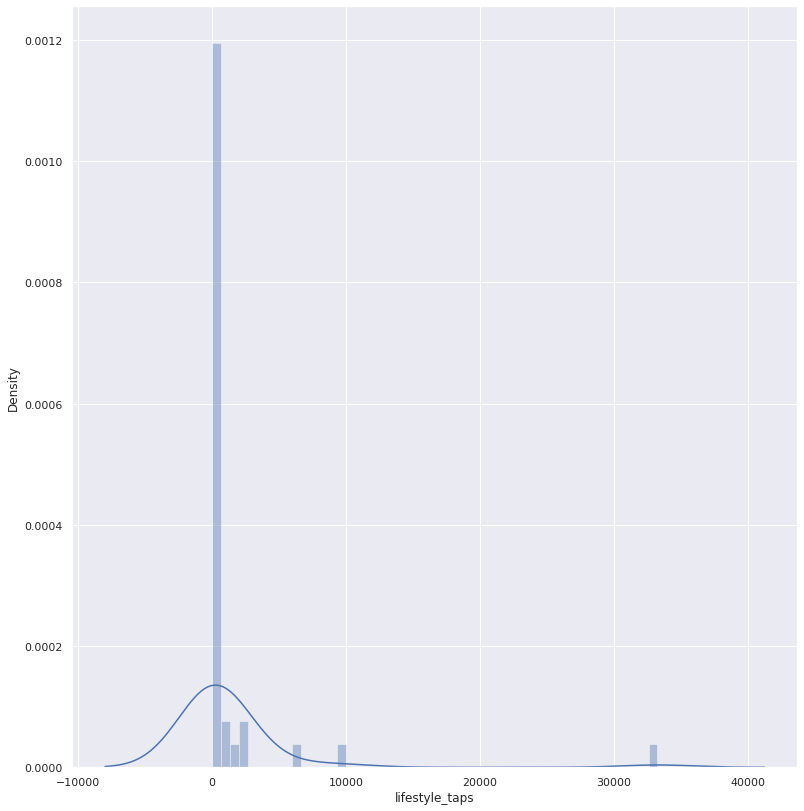

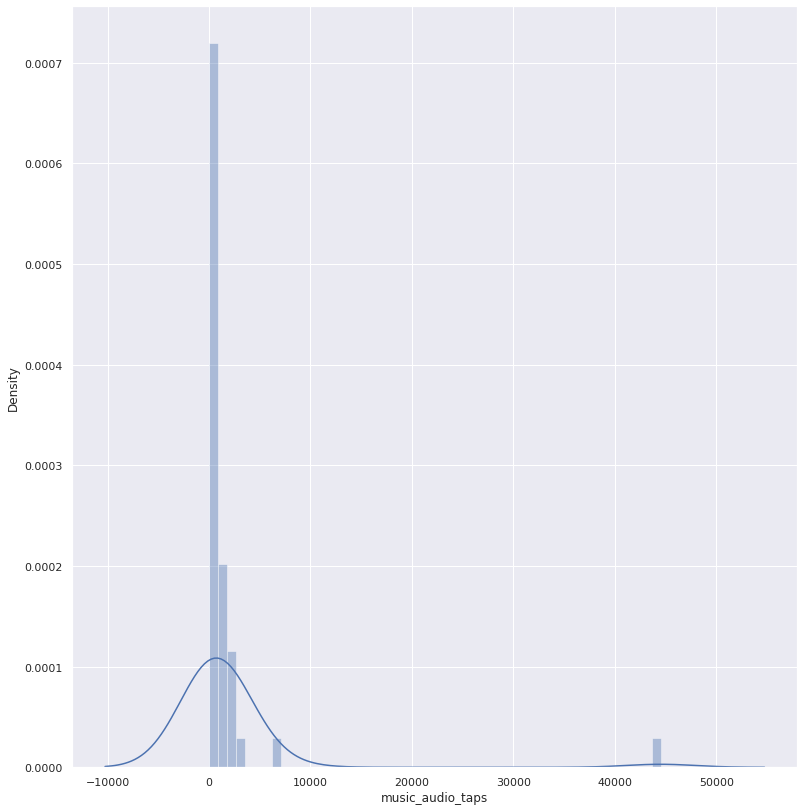

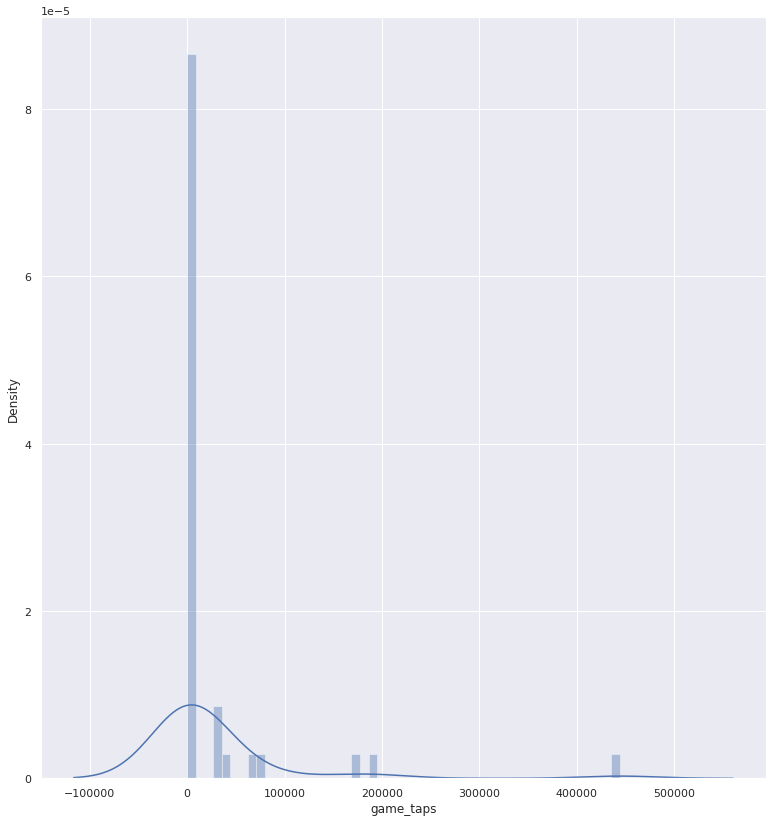

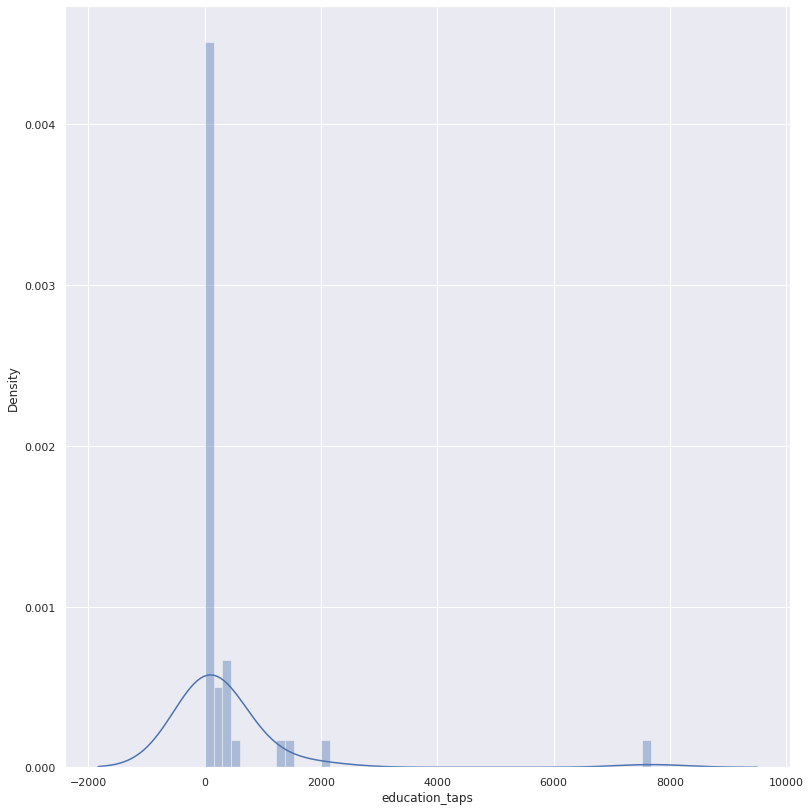

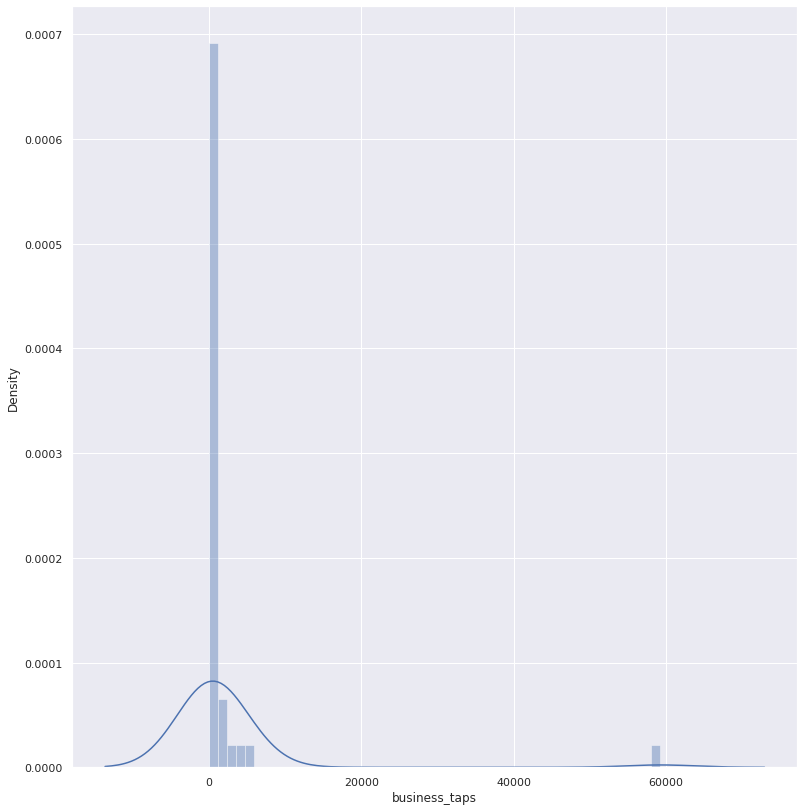

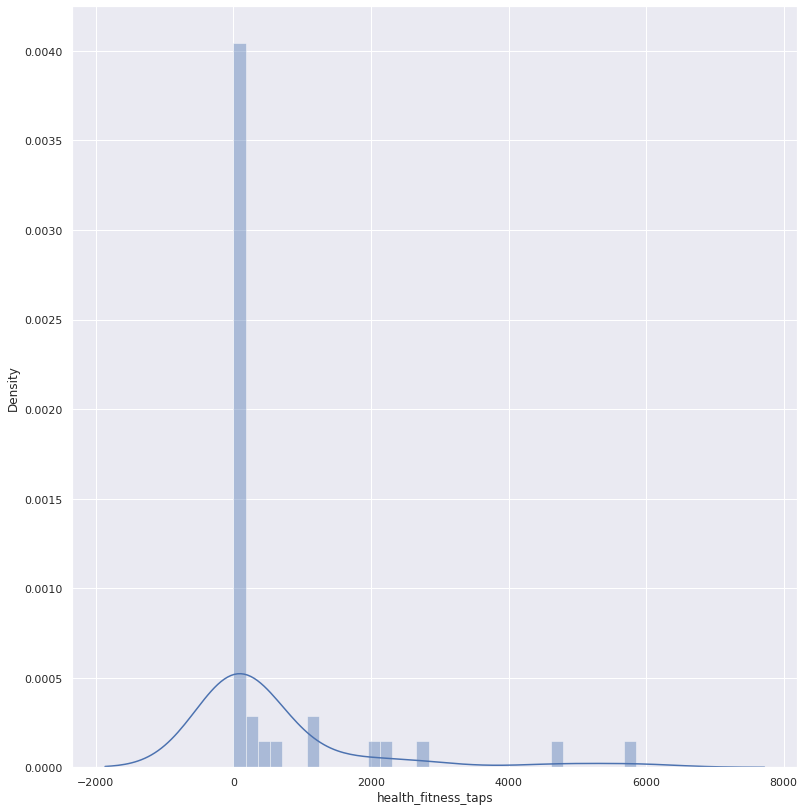

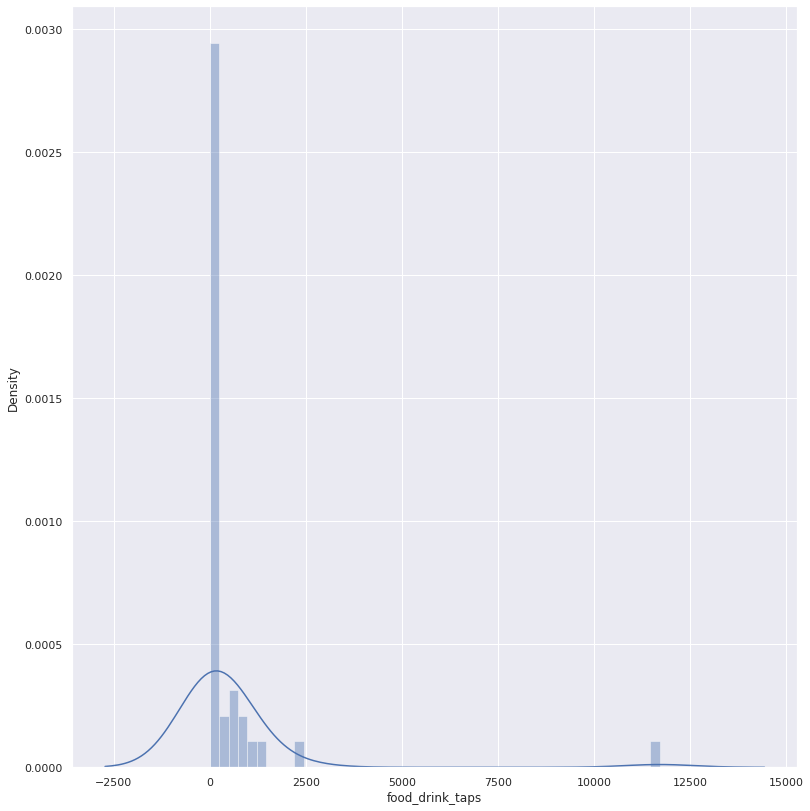

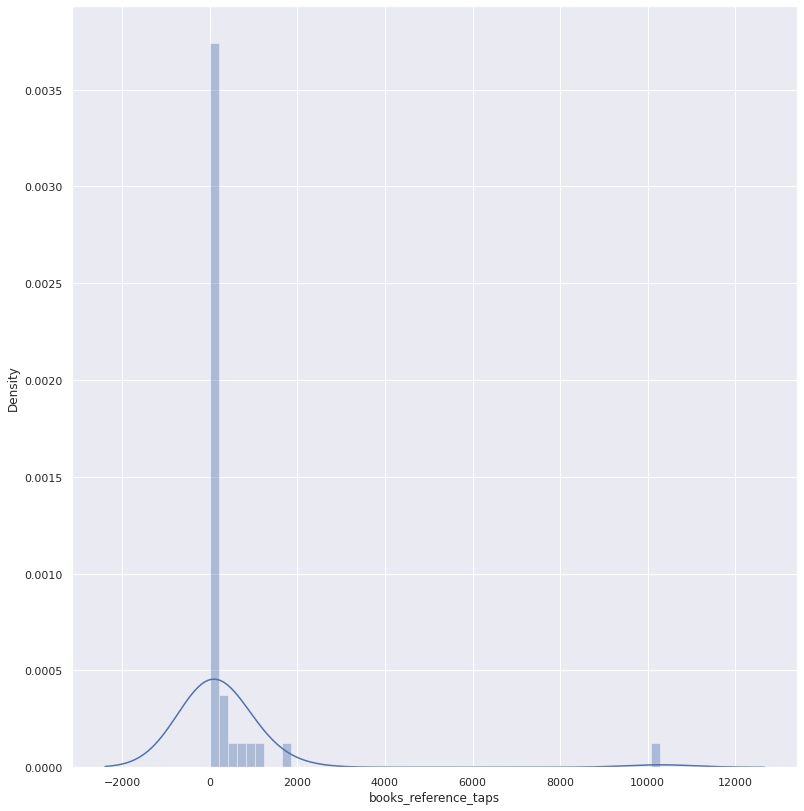

In [57]:
#summed_taps_part.hist(column='travel_taps', bins=39);
sns.set(rc={"figure.figsize":(13, 14)})
for i, col in enumerate(without_ind.columns):
    plt.figure(i)
    sns.distplot(without_ind[col])

/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local

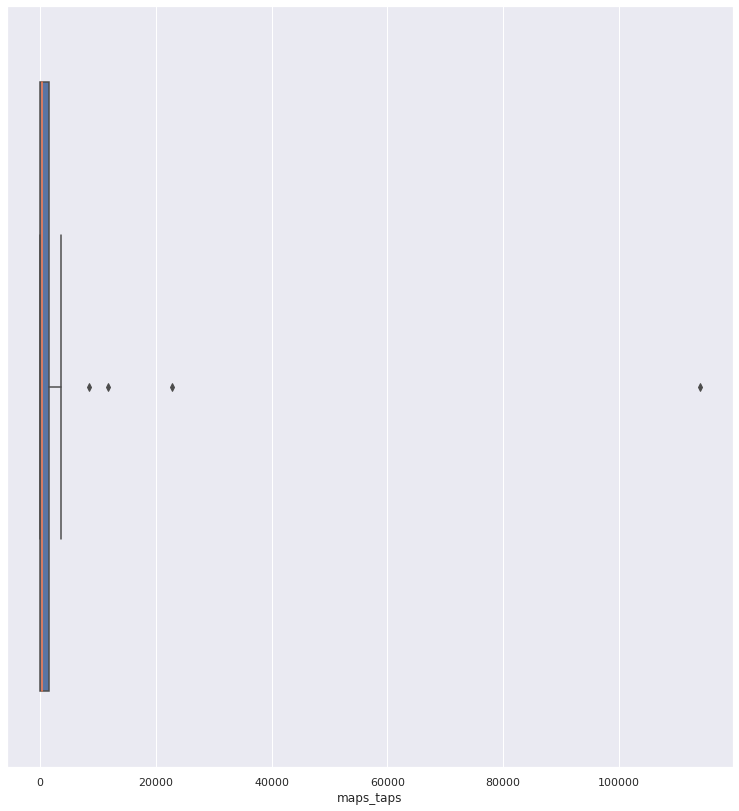

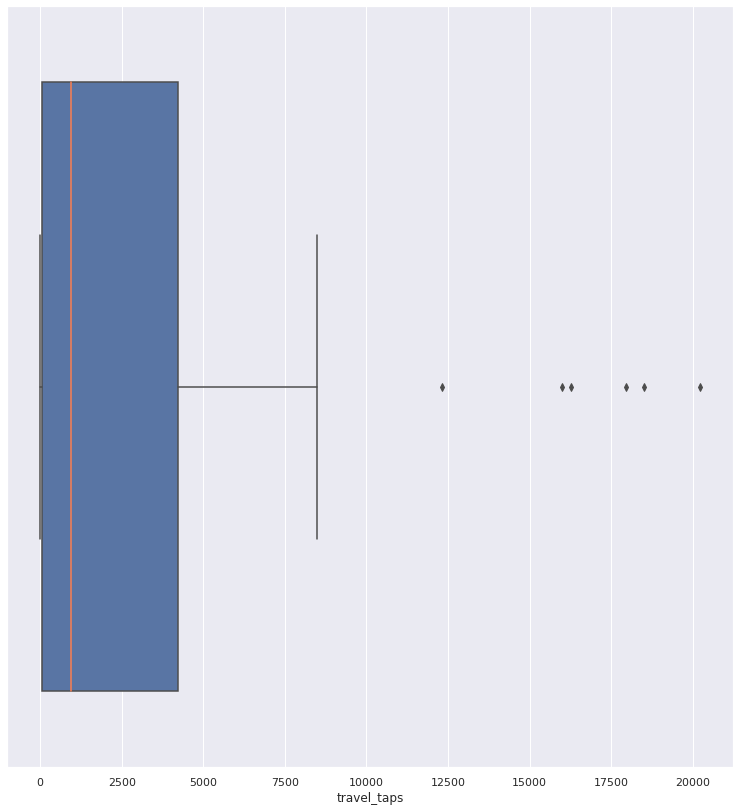

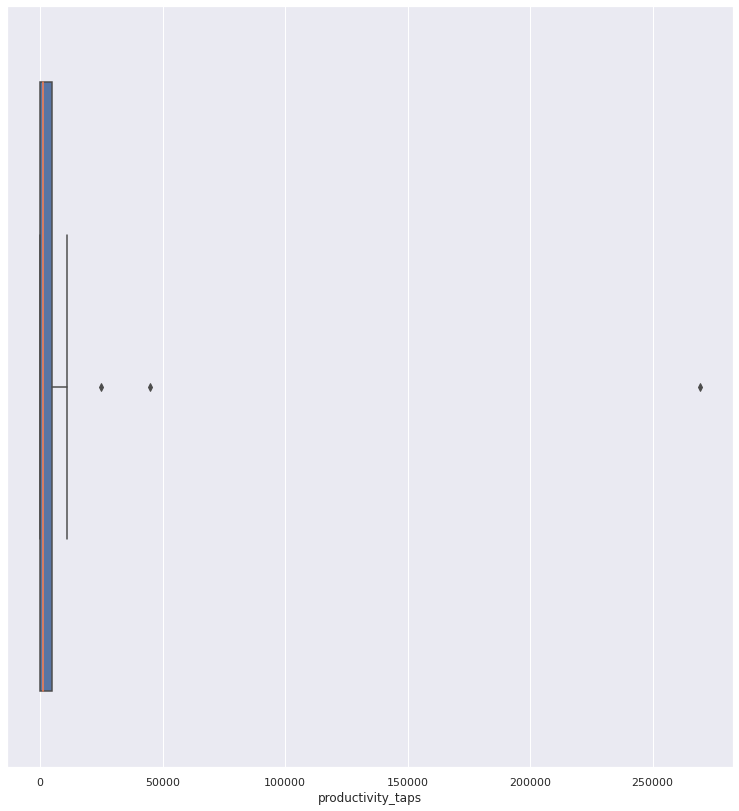

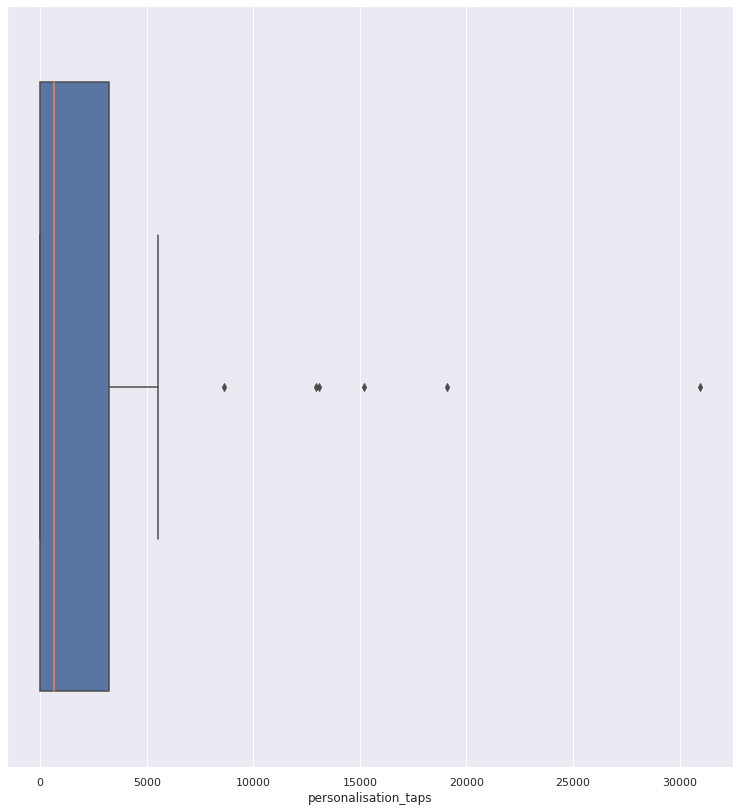

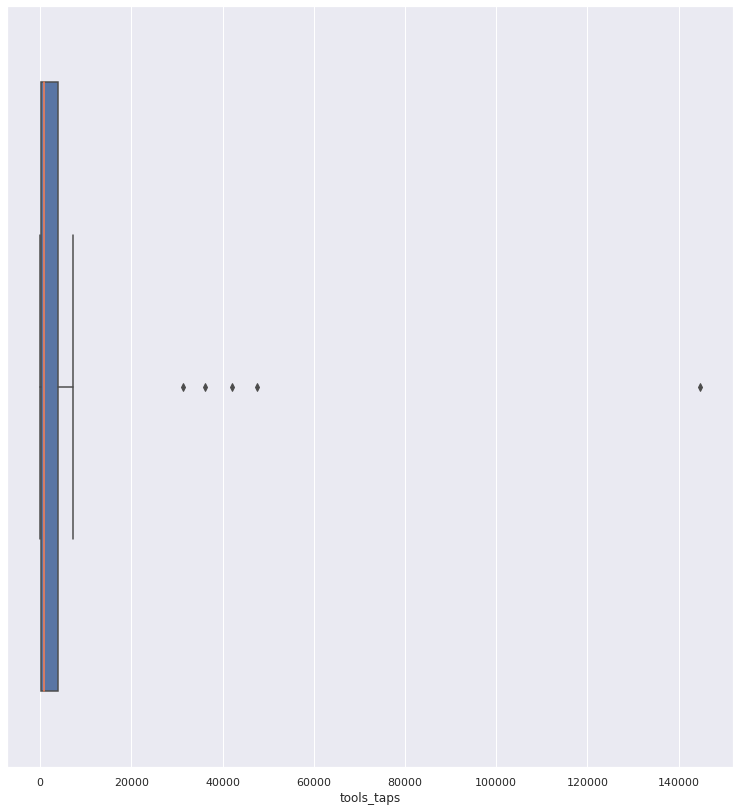

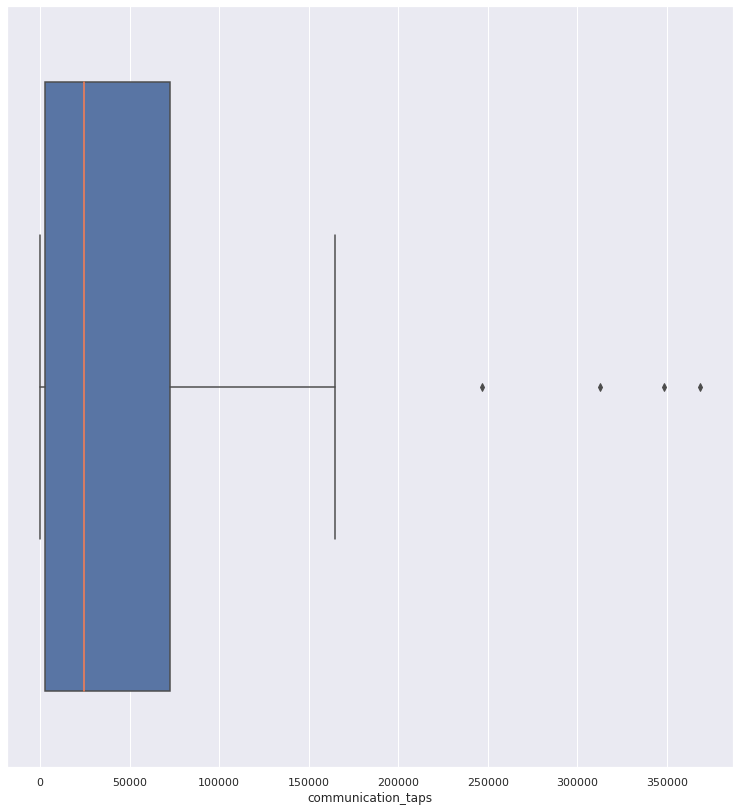

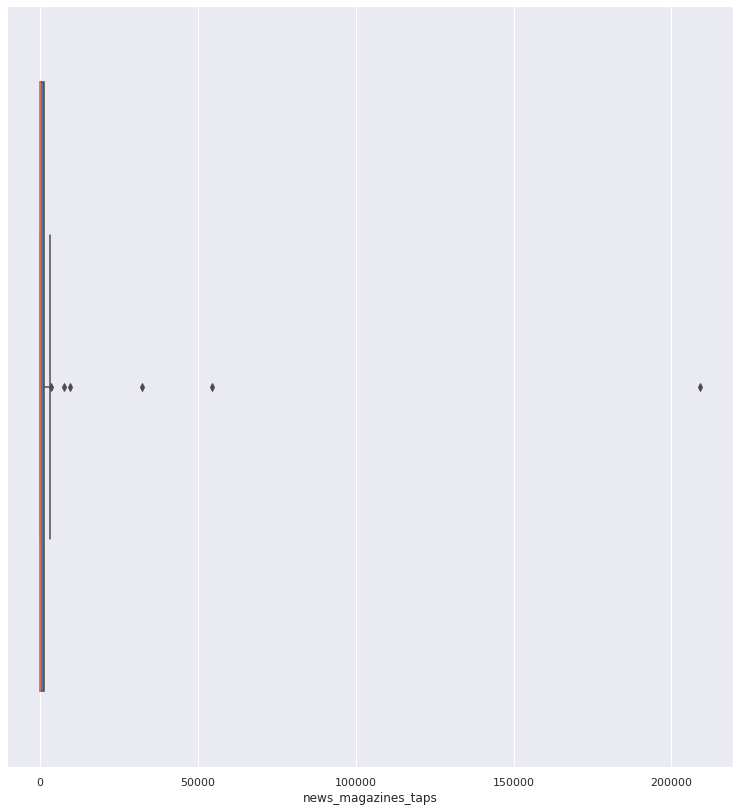

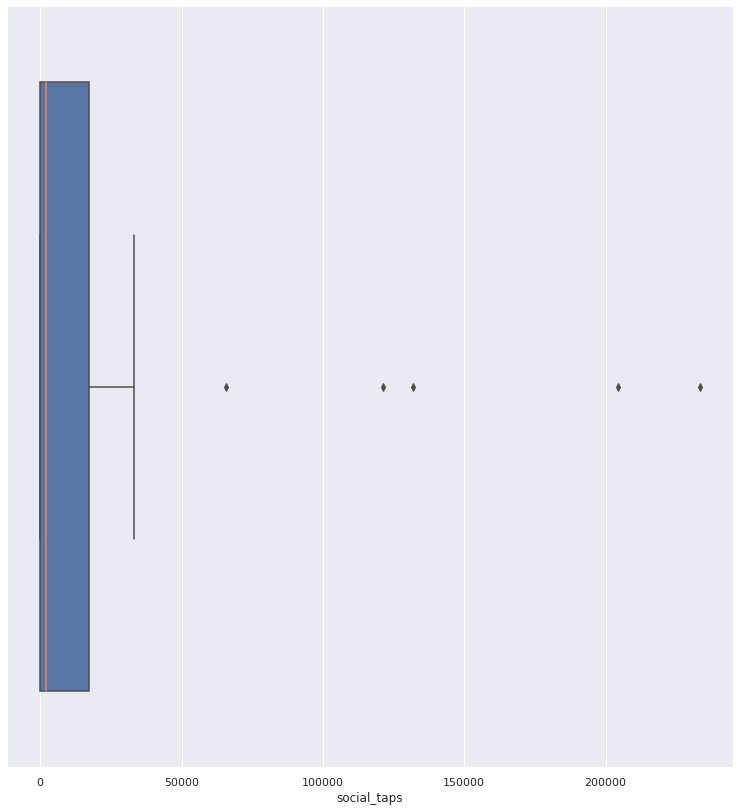

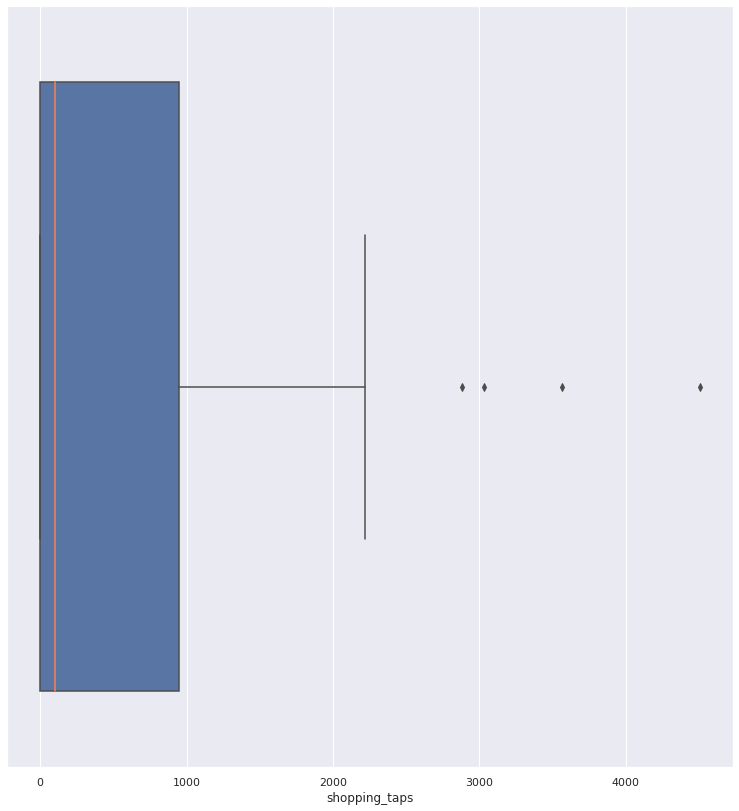

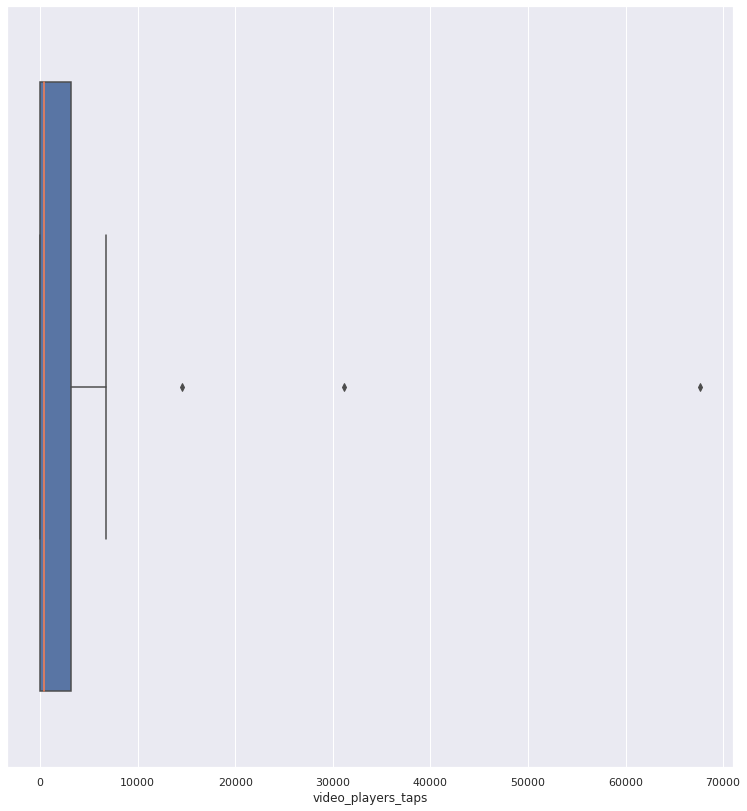

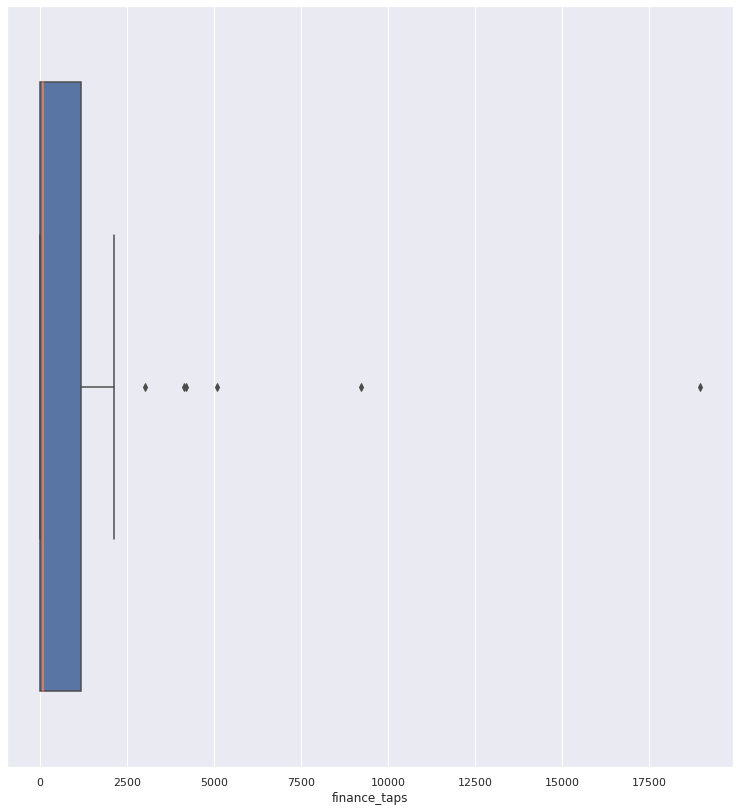

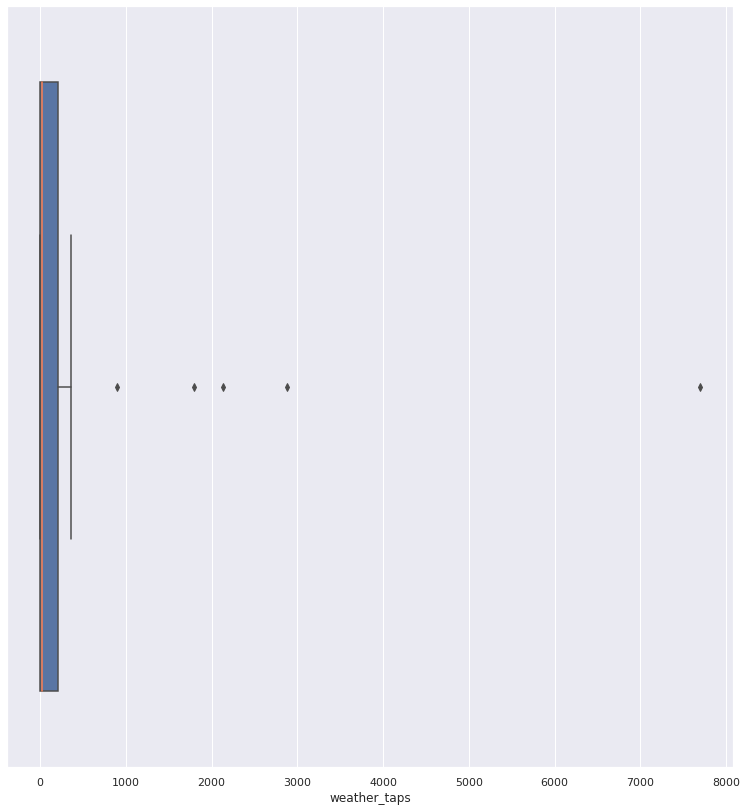

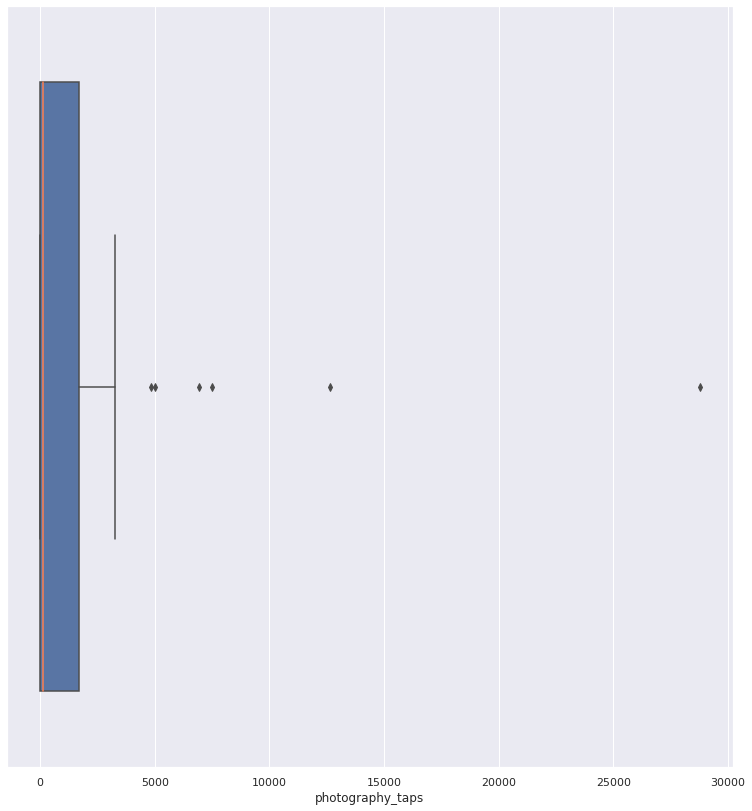

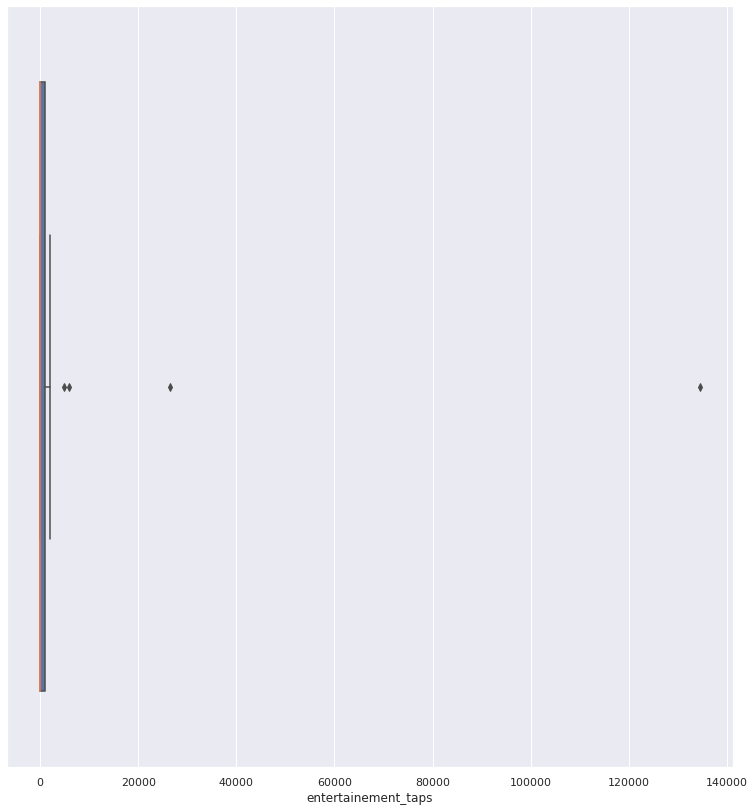

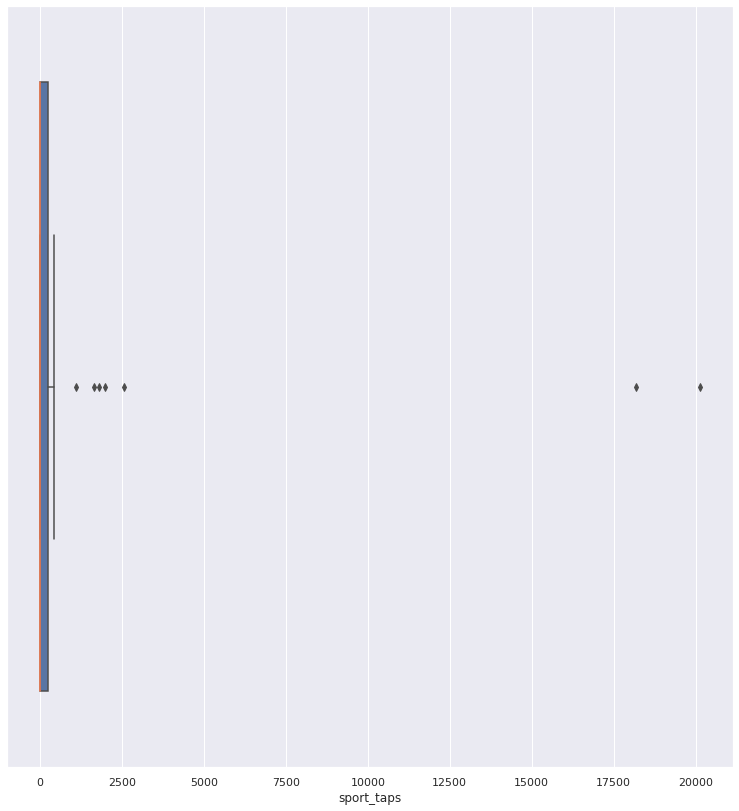

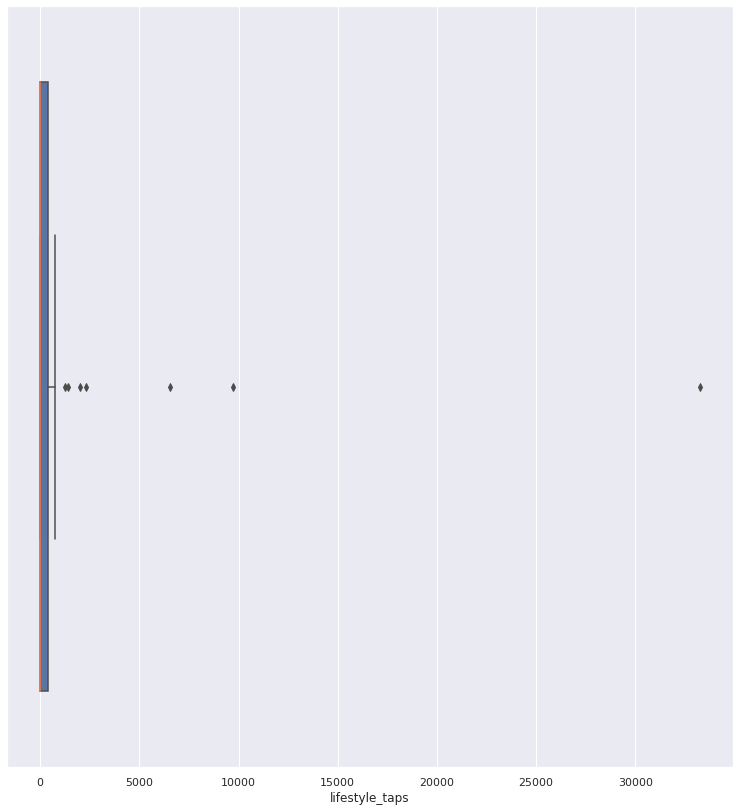

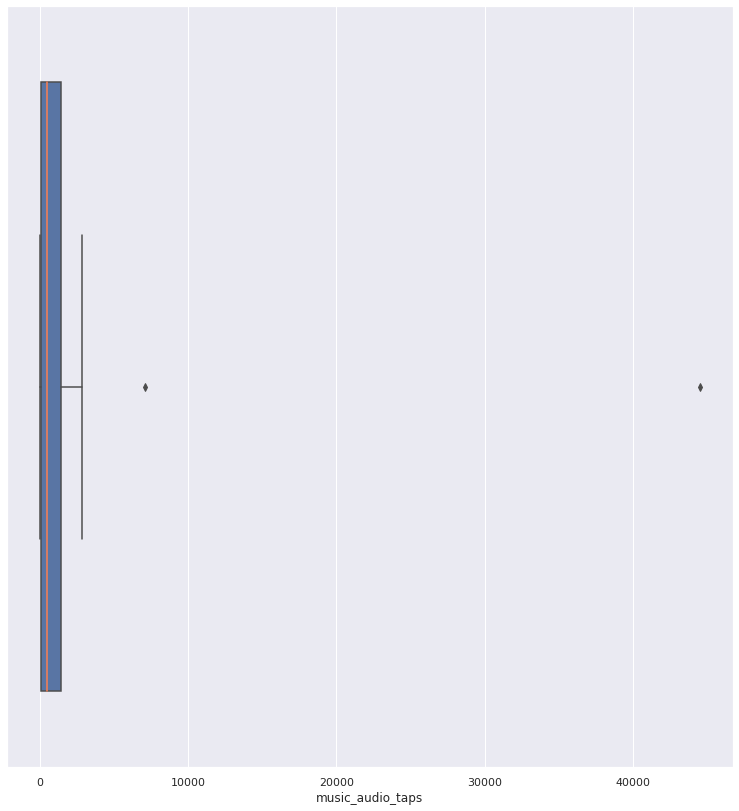

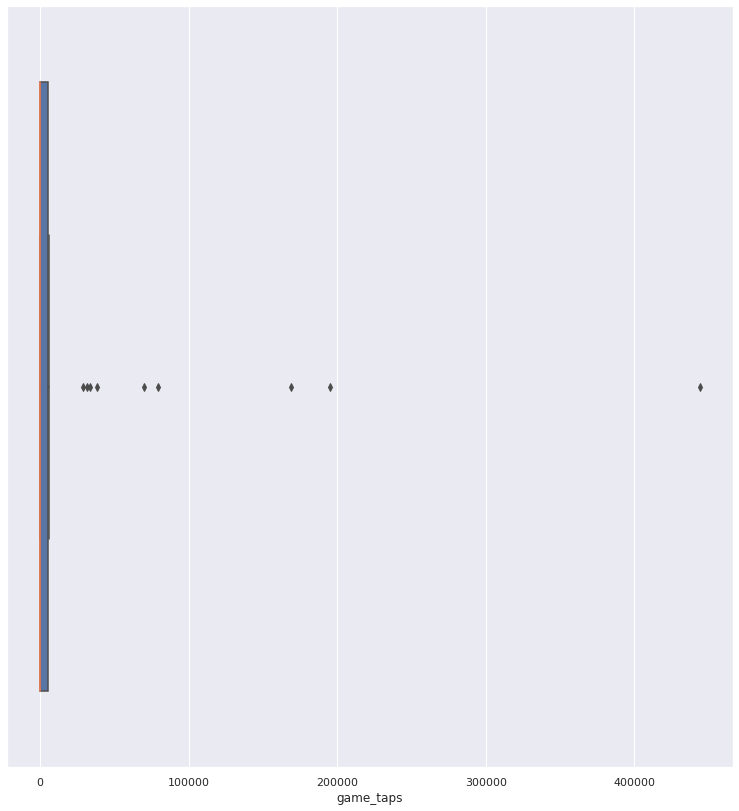

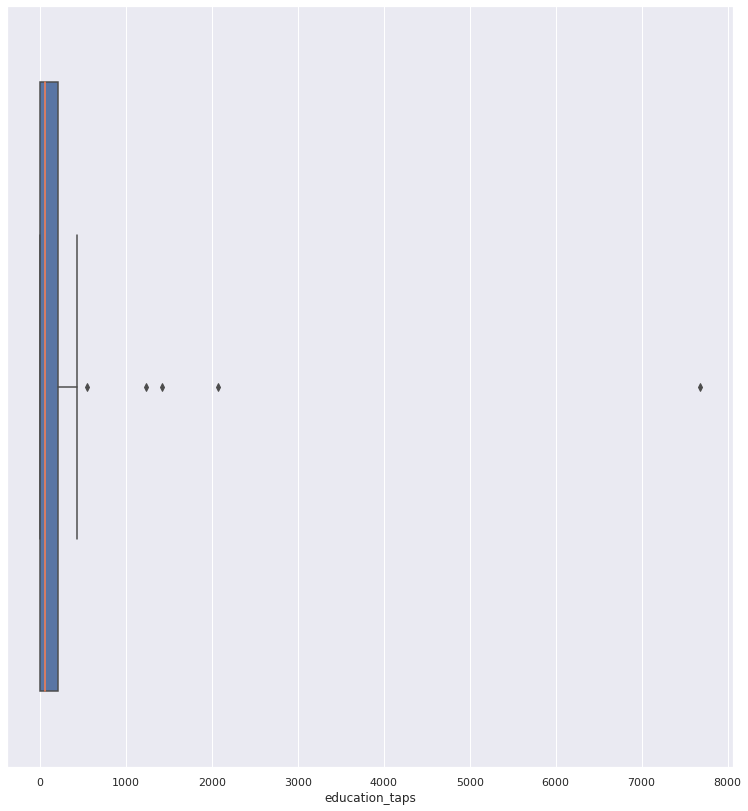

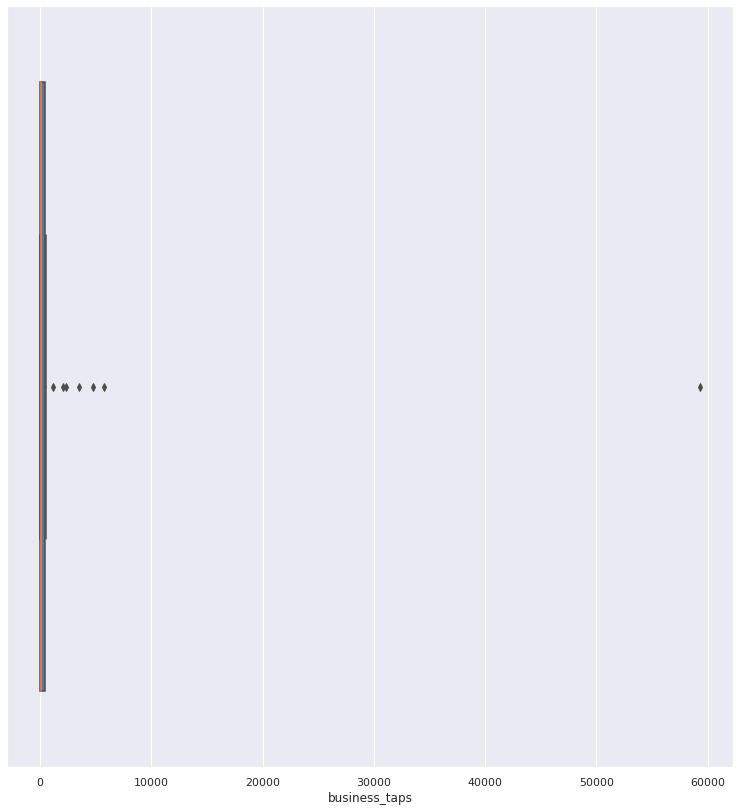

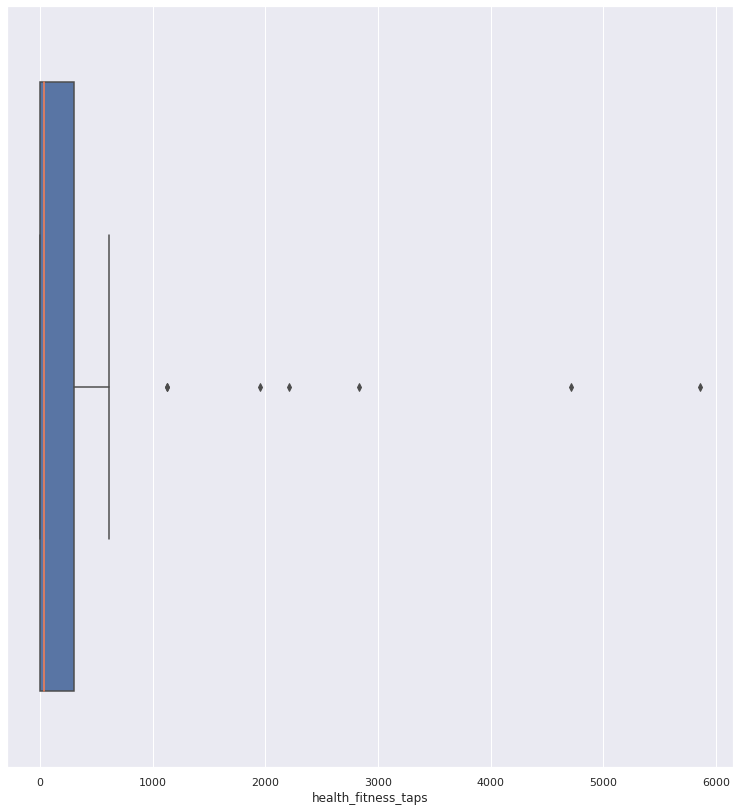

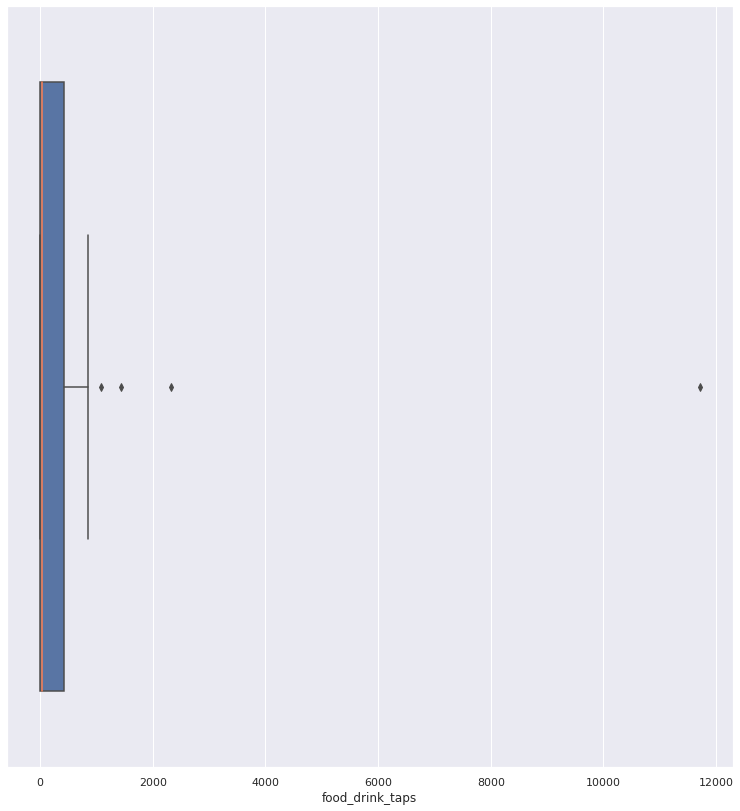

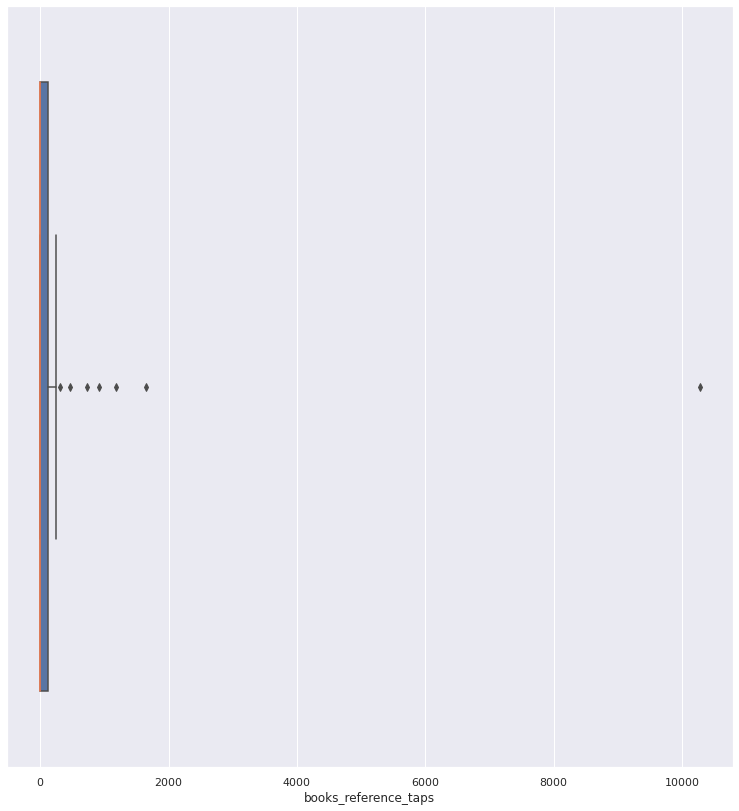

In [68]:
#summed_taps_part.hist(column='travel_taps', bins=39);
sns.set(rc={"figure.figsize":(13, 14)})
for i, col in enumerate(without_ind.columns):
    plt.figure(i)
    sns.boxplot(without_ind[col],medianprops={"color": "coral"},)

/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local

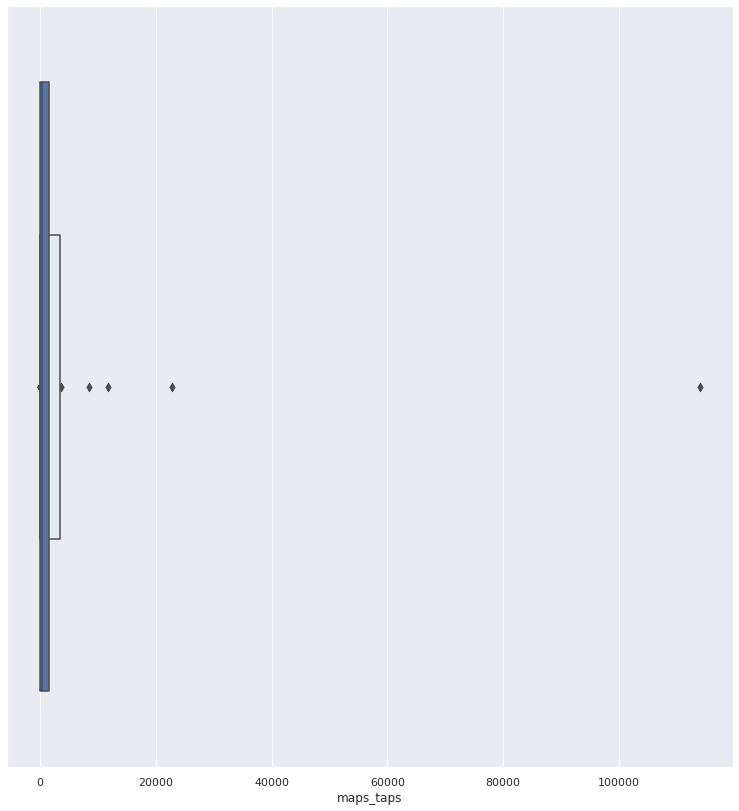

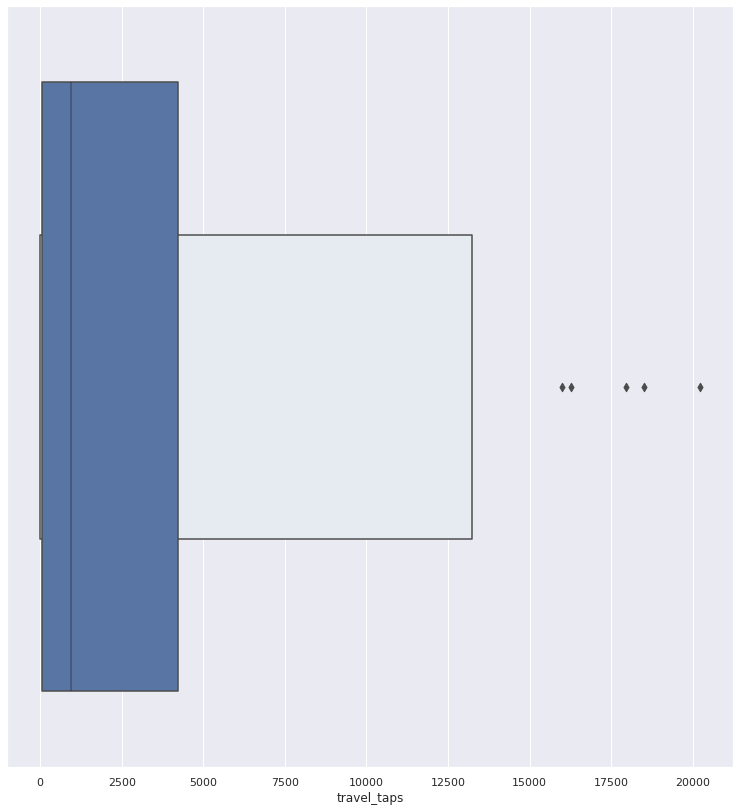

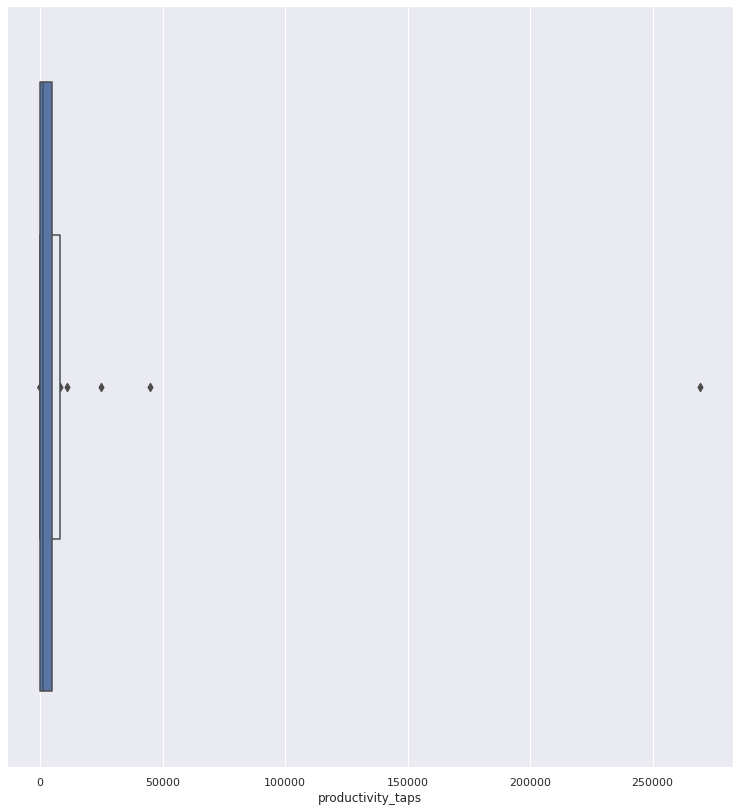

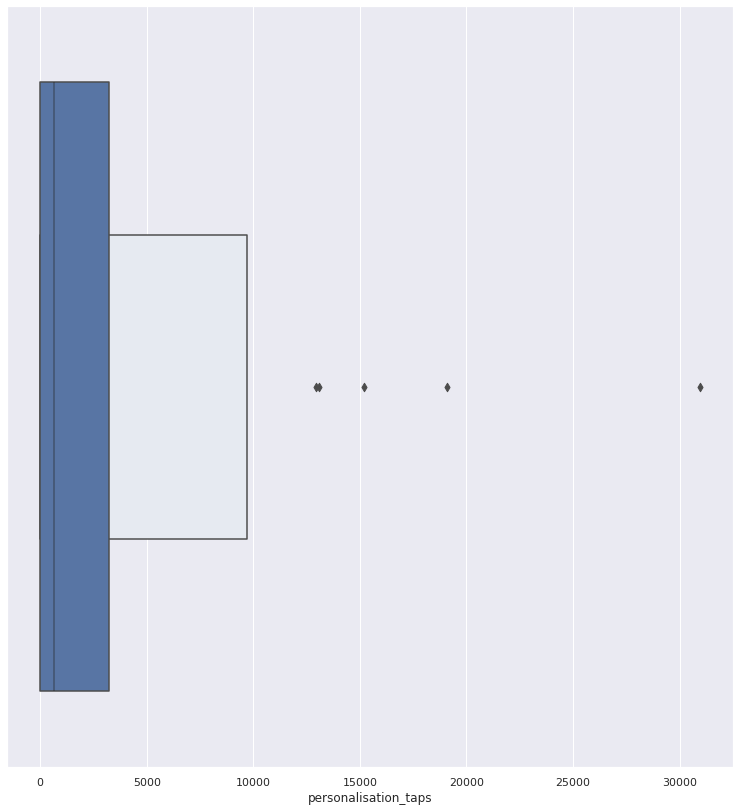

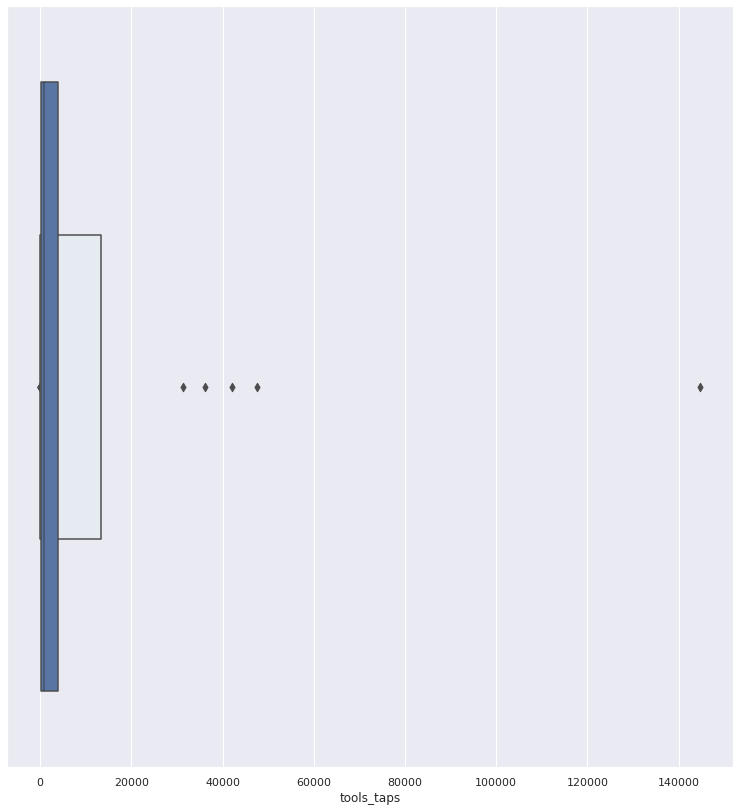

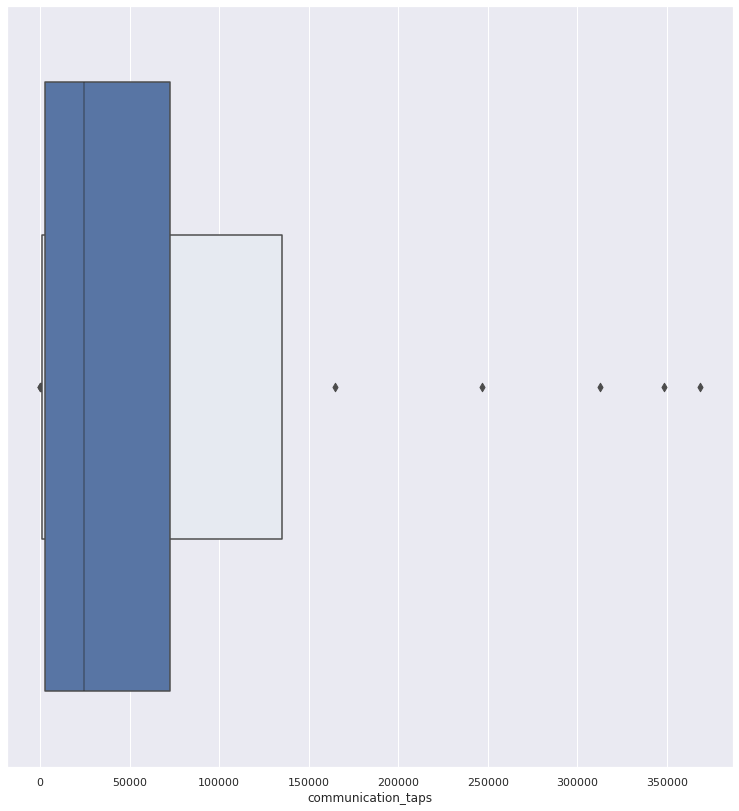

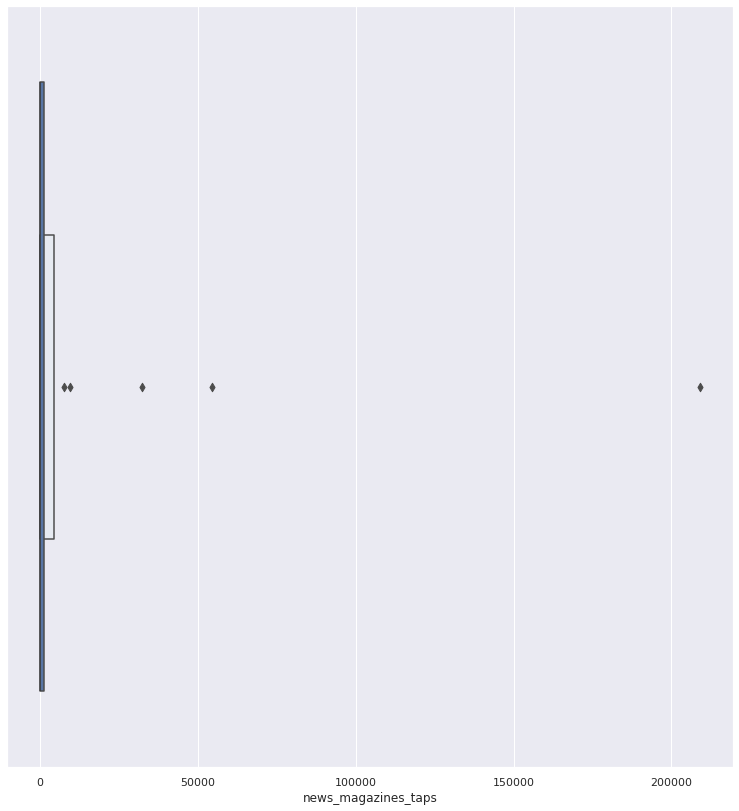

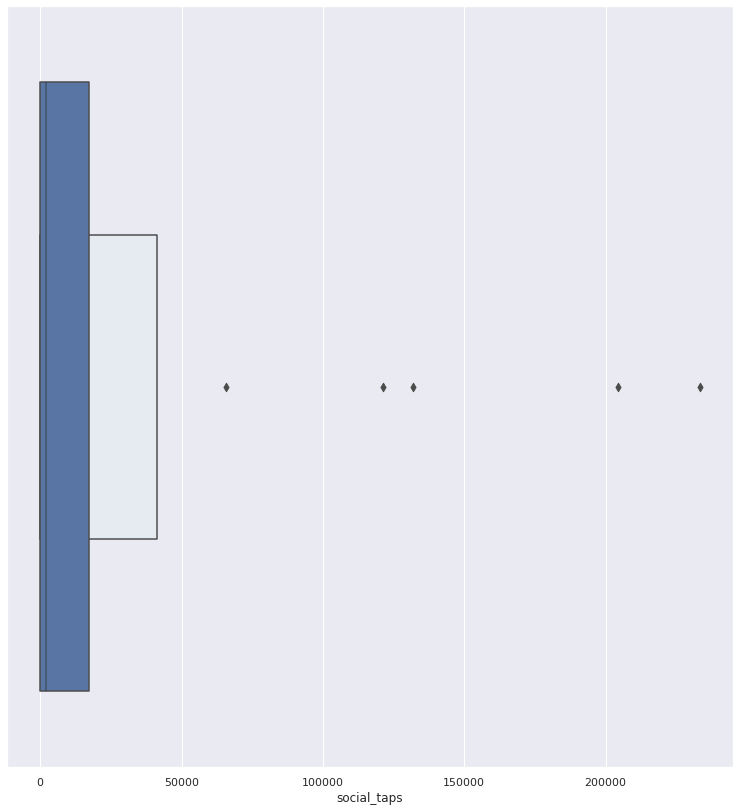

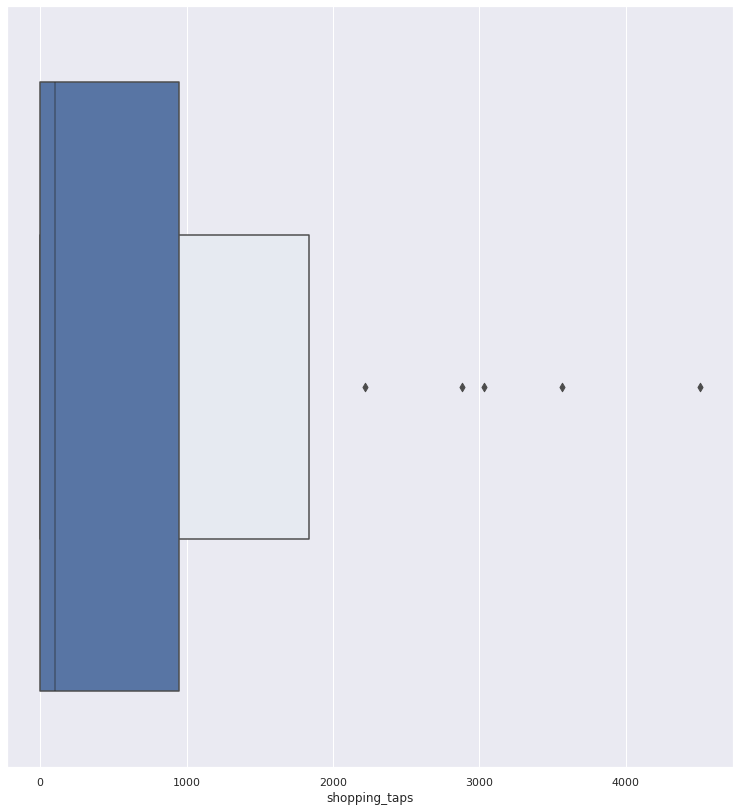

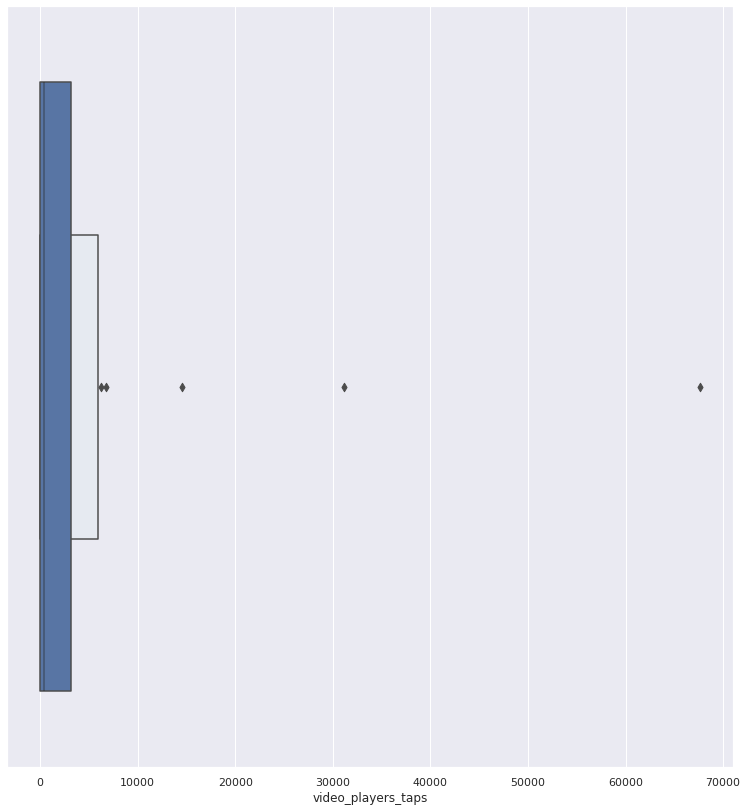

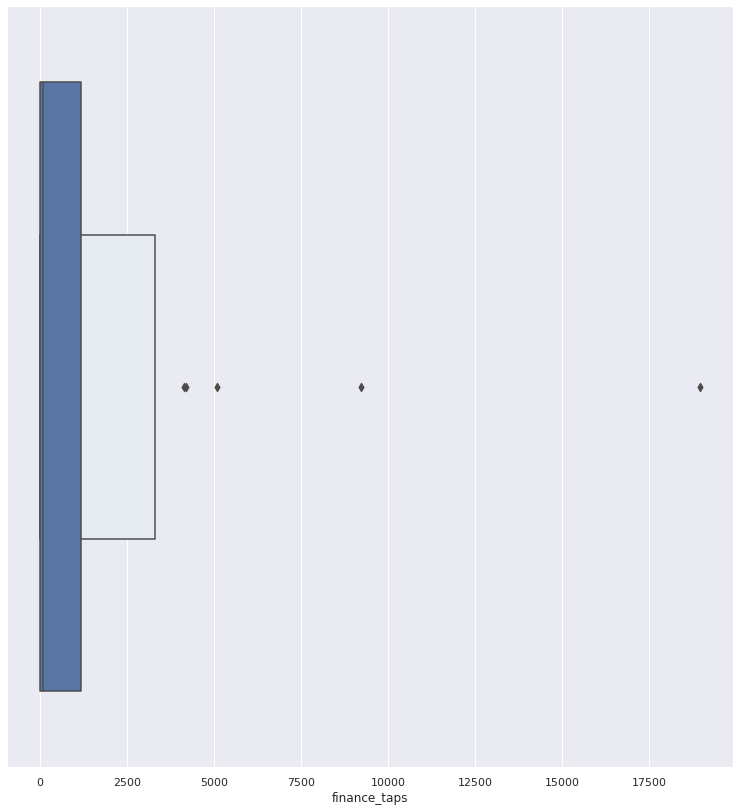

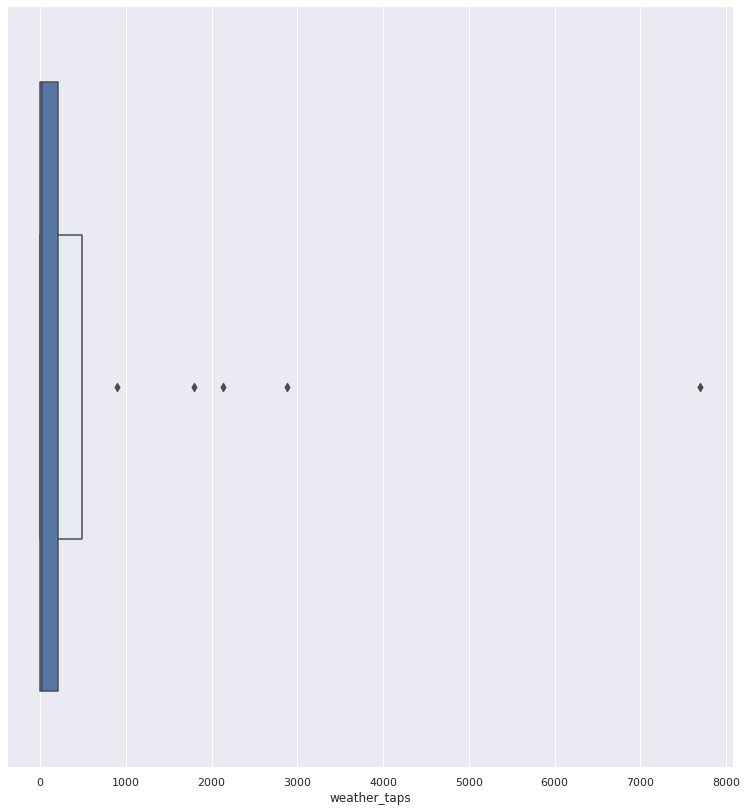

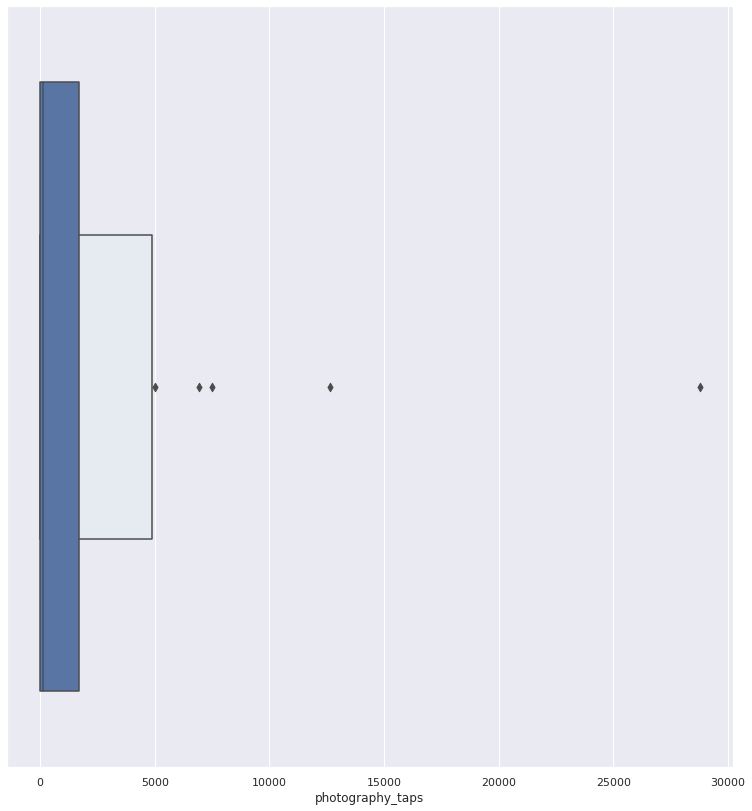

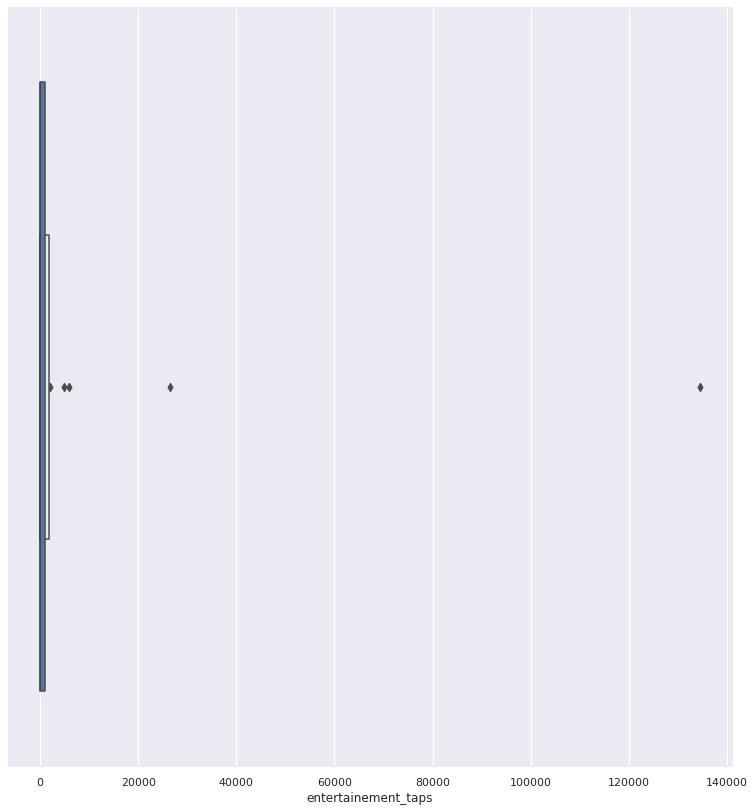

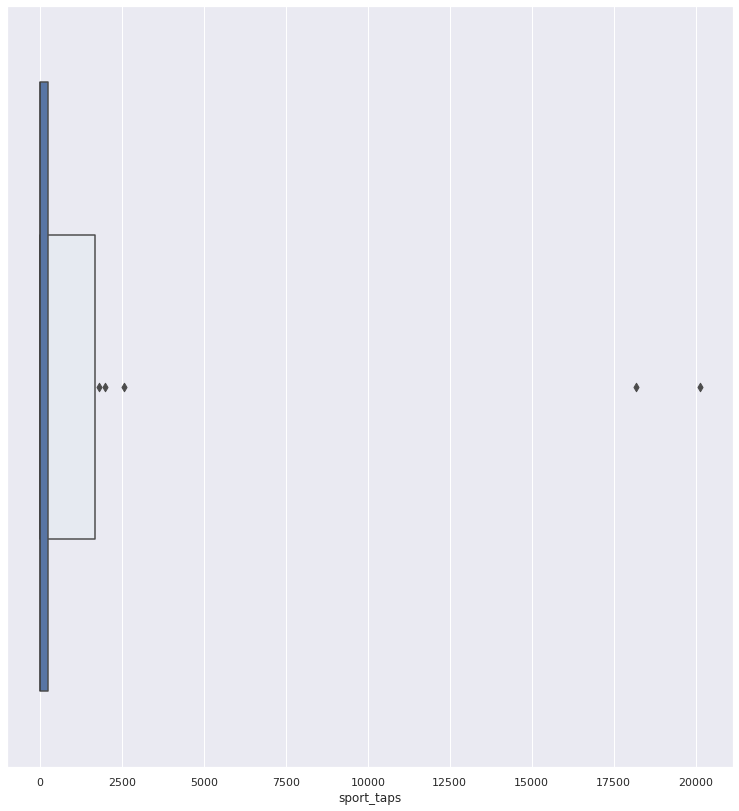

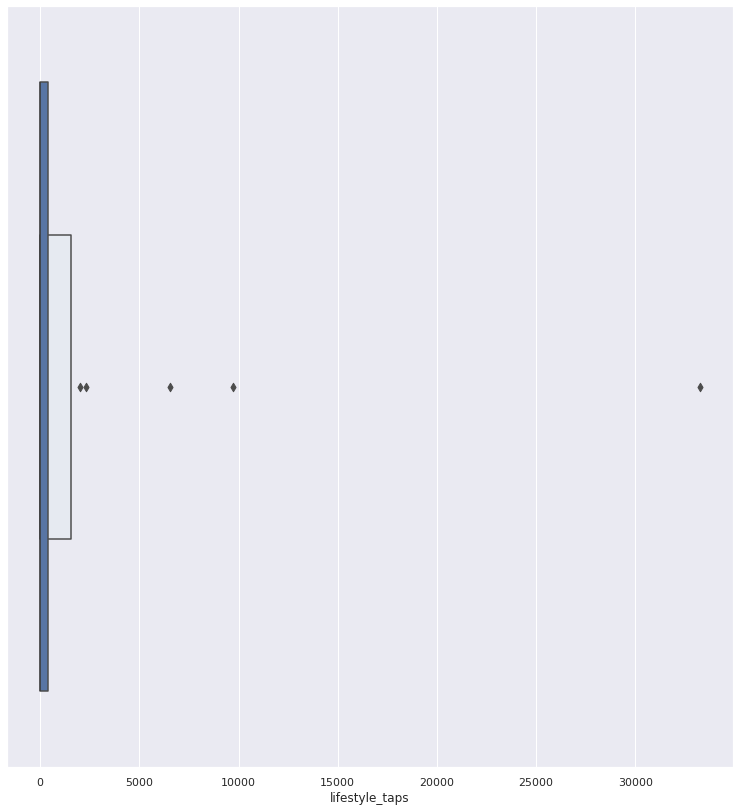

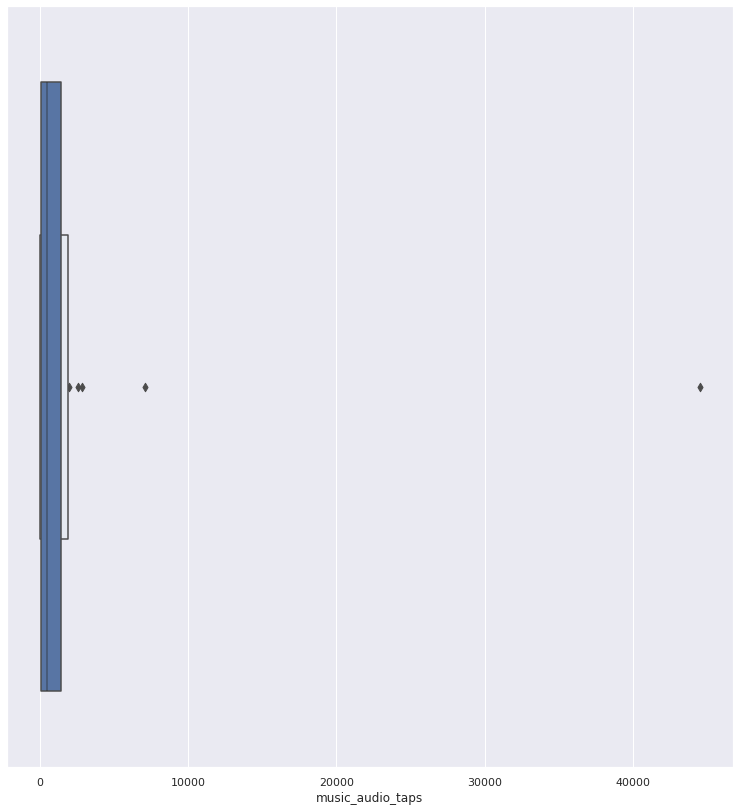

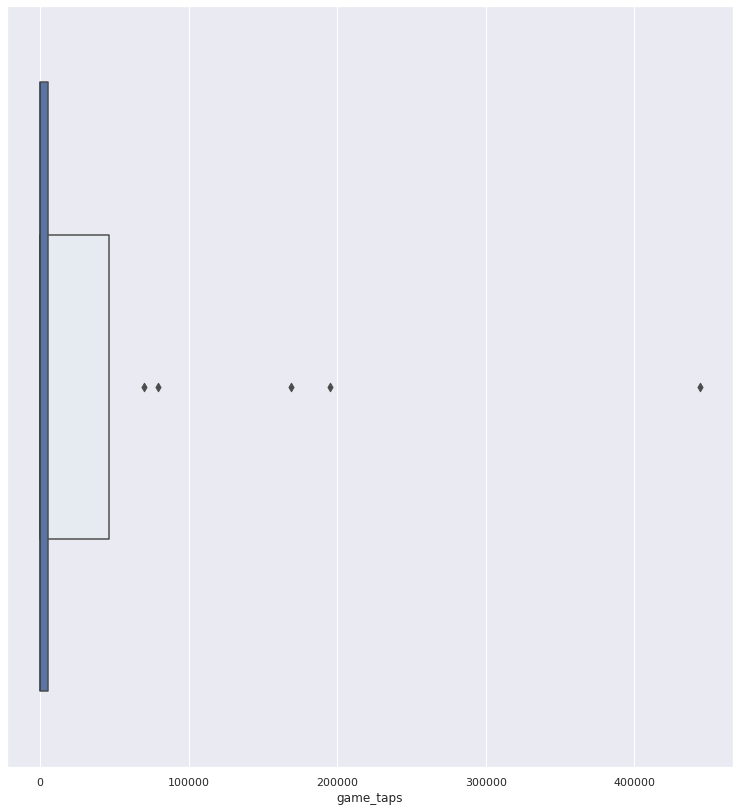

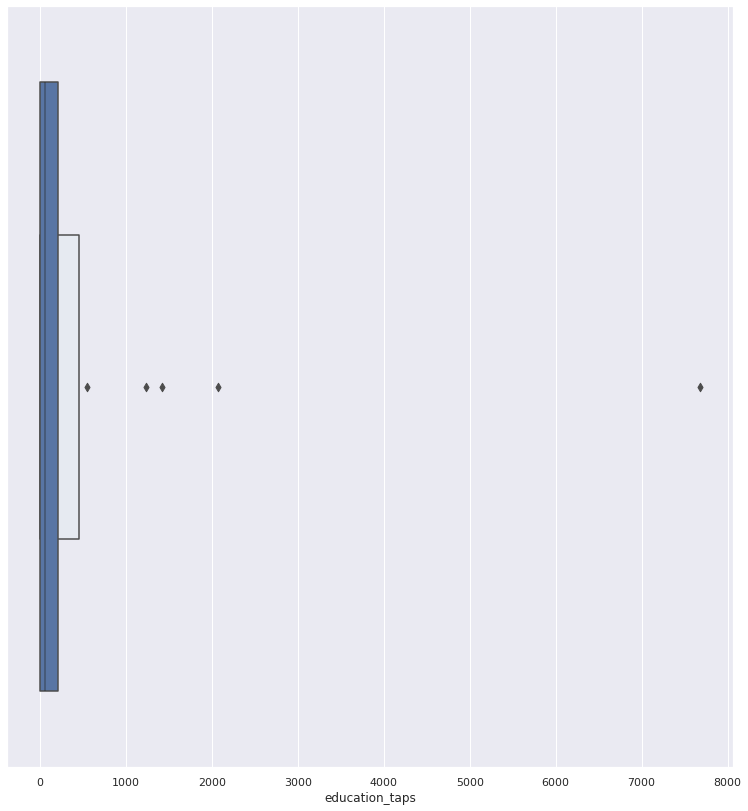

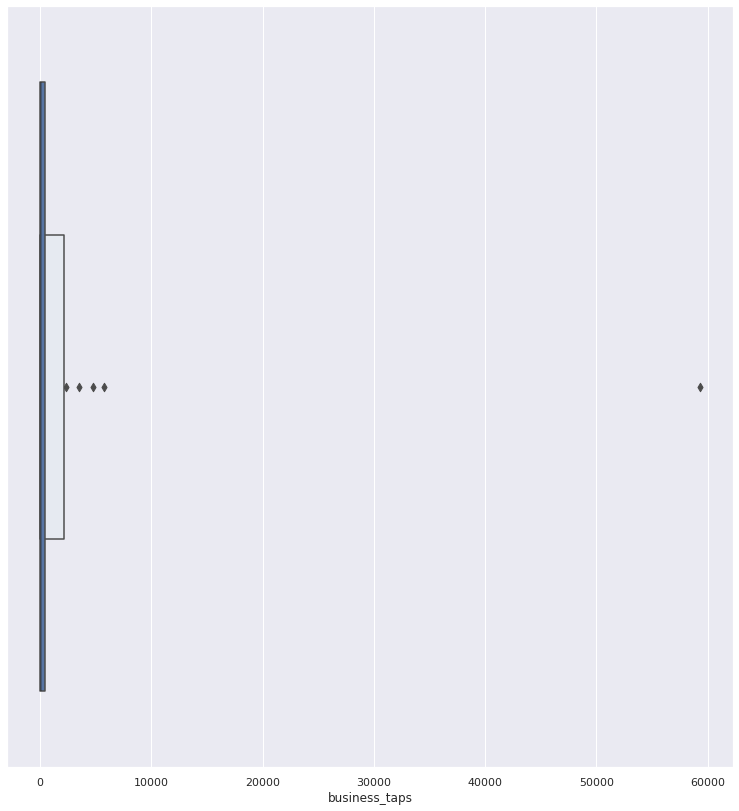

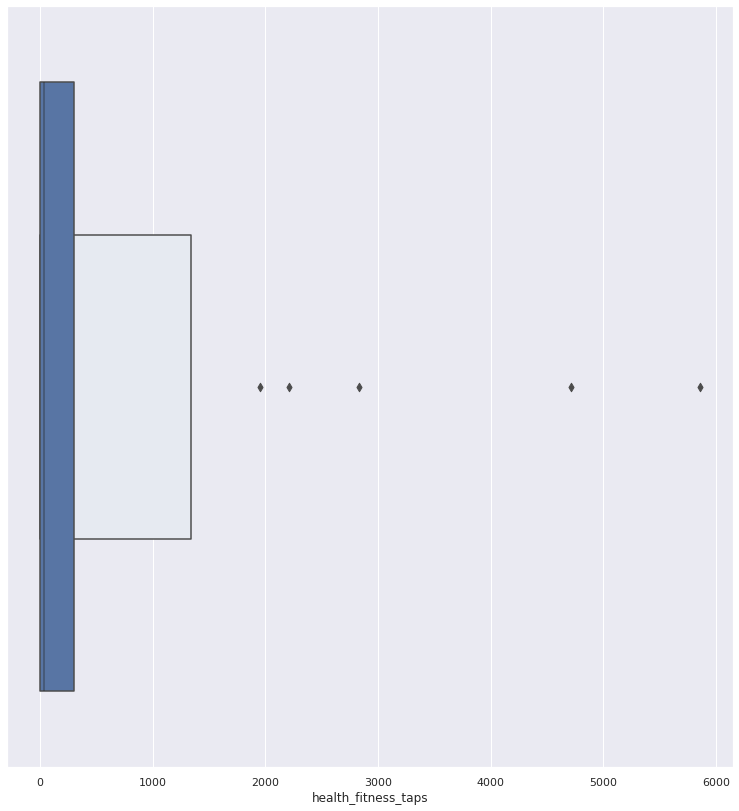

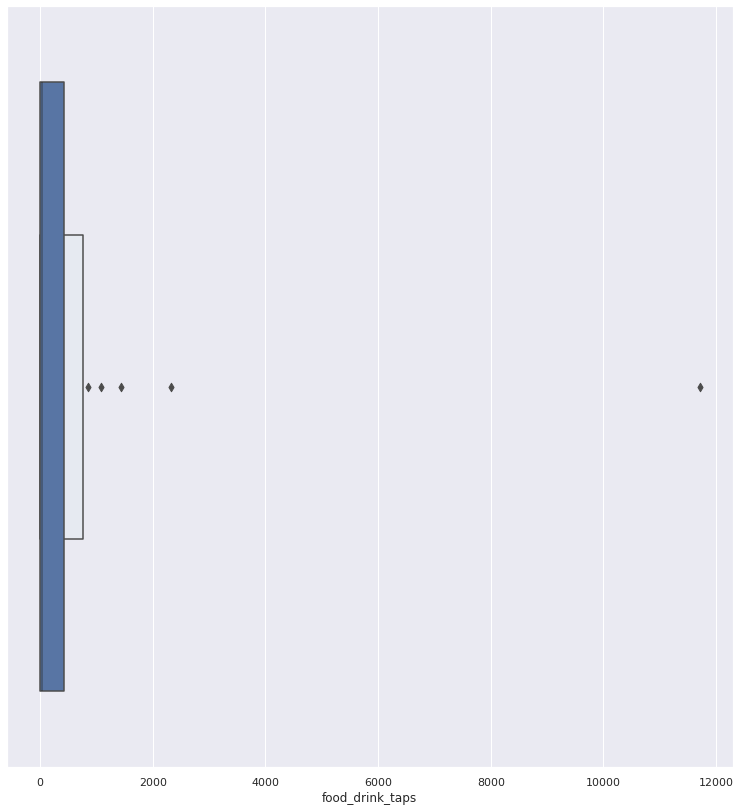

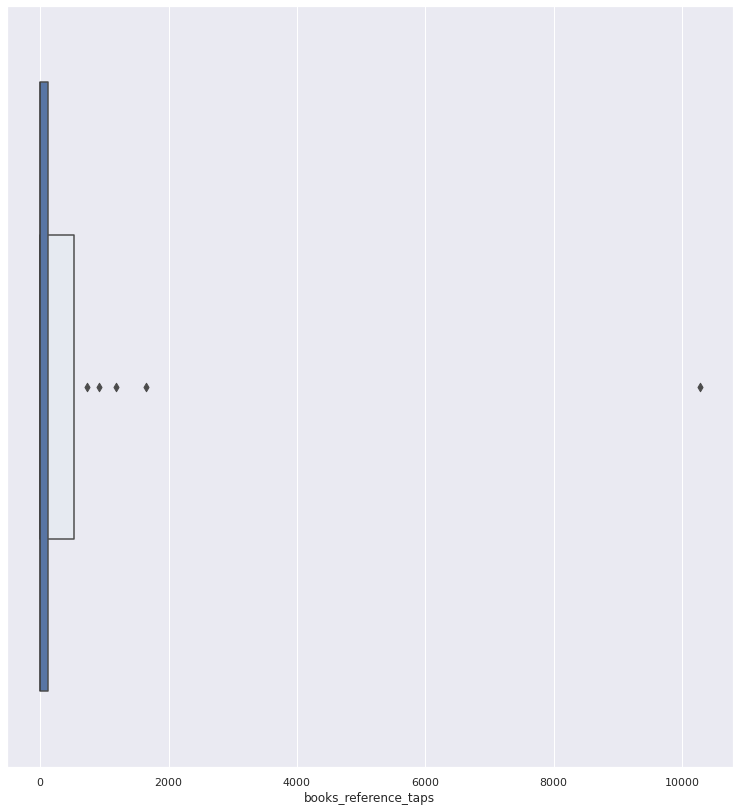

In [70]:
sns.set(rc={"figure.figsize":(13, 14)})
for i, col in enumerate(without_ind.columns):
    plt.figure(i)
    sns.boxenplot(without_ind[col])

<AxesSubplot:>

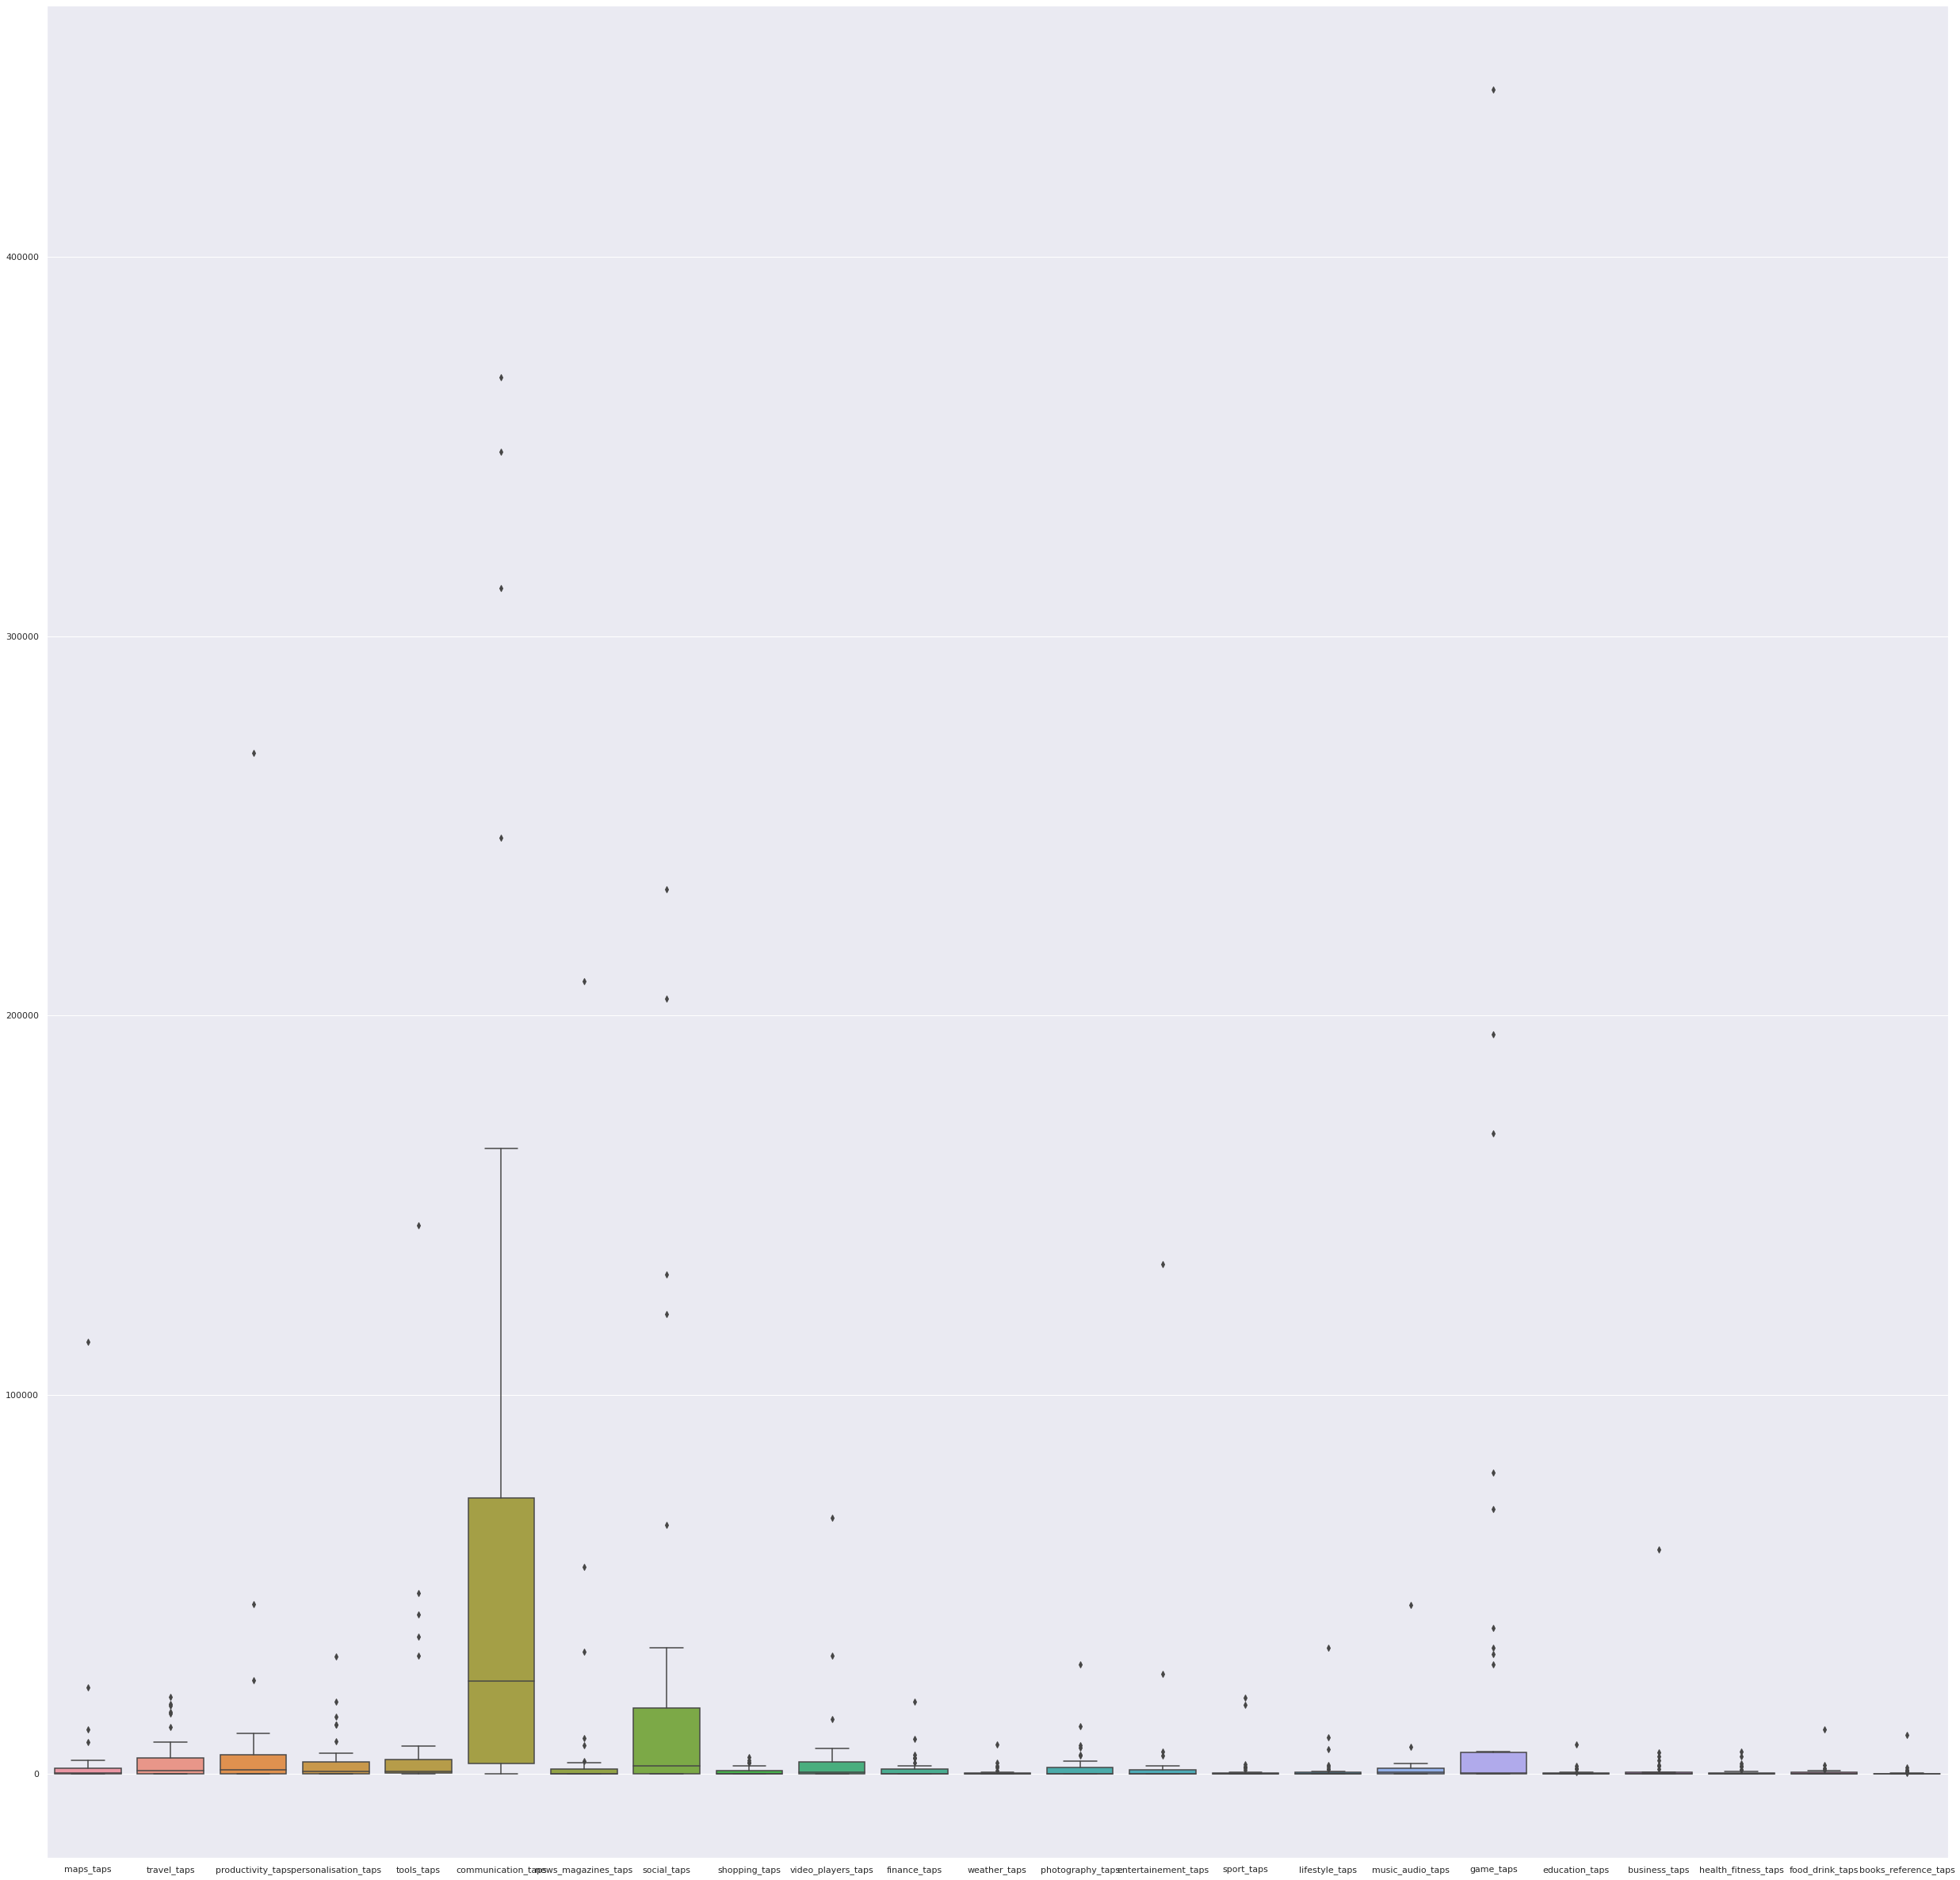

In [89]:
sns.set(rc={"figure.figsize":(43, 43)})
sns.boxplot(data=without_ind)

In [130]:
# Descriptive statiscs of the distance 
distance_stat = final_data.groupby(['index'])['home_distance'].describe()
distance_stat

,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,
138e00cbba7d2ffd4529a40085503e72a50f28eb,90.0,0.607027,2.184090,0.000060,0.000742,0.000945,0.014822,15.086368
138e0597ea9b57894f38aee74a16a0186c1528eb,734.0,85.221638,86.480365,0.000300,0.011012,4.585391,173.157703,207.470845
138e0de80f19742f475087d5bab348345f4328eb,561.0,9.905330,10.446393,0.000000,0.029135,3.063618,18.667044,26.381576
138e0f9168ca102c4e0eb46b4815c94cc9cf28eb,3694.0,1011.690168,2955.520935,0.000075,0.005560,0.527224,5.032865,9786.732580
138e16263a067d1a45c0a6c0a8e494e939f828eb,1369.0,154.688928,207.352426,0.000999,0.023528,1.817336,441.589246,482.474507
138e19840f04b4e548058277ba44ff1e192a28eb,78.0,0.470978,0.414526,0.000000,0.456155,0.476008,0.481061,2.405773
138e1b37bd14340542c5a02724539c59c99e28eb,515.0,7.008188,3.740381,0.000000,7.137781,7.147852,7.150240,22.500338
138e35ce1a3df38d438bbac4a7d76b8a25e528eb,1343.0,7.821048,7.083782,0.276640,2.125814,3.069609,18.098005,22.868830
138e364b7d0241a44f25bc054d05f7c3e16828eb,4891.0,41.267387,295.239750,0.000240,0.008526,0.017620,6.462869,2781.675659


In [124]:
distance_stat.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,138e00cbba7d2ffd4529a40085503e72a50f28eb,90.0,0.607027,2.184090,0.000060,0.000742,0.000945,0.014822,15.086368
1,138e0597ea9b57894f38aee74a16a0186c1528eb,734.0,85.221638,86.480365,0.000300,0.011012,4.585391,173.157703,207.470845
2,138e0de80f19742f475087d5bab348345f4328eb,561.0,9.905330,10.446393,0.000000,0.029135,3.063618,18.667044,26.381576
3,138e0f9168ca102c4e0eb46b4815c94cc9cf28eb,3694.0,1011.690168,2955.520935,0.000075,0.005560,0.527224,5.032865,9786.732580
4,138e16263a067d1a45c0a6c0a8e494e939f828eb,1369.0,154.688928,207.352426,0.000999,0.023528,1.817336,441.589246,482.474507
5,138e19840f04b4e548058277ba44ff1e192a28eb,78.0,0.470978,0.414526,0.000000,0.456155,0.476008,0.481061,2.405773
6,138e1b37bd14340542c5a02724539c59c99e28eb,515.0,7.008188,3.740381,0.000000,7.137781,7.147852,7.150240,22.500338
7,138e35ce1a3df38d438bbac4a7d76b8a25e528eb,1343.0,7.821048,7.083782,0.276640,2.125814,3.069609,18.098005,22.868830
8,138e364b7d0241a44f25bc054d05f7c3e16828eb,4891.0,41.267387,295.239750,0.000240,0.008526,0.017620,6.462869,2781.675659
9,138e4270a54e586c43d09b9981d0b85cd56e28eb,14816.0,514.756370,144.209924,0.000000,555.809794,587.542488,587.562789,636.907259


<AxesSubplot:>

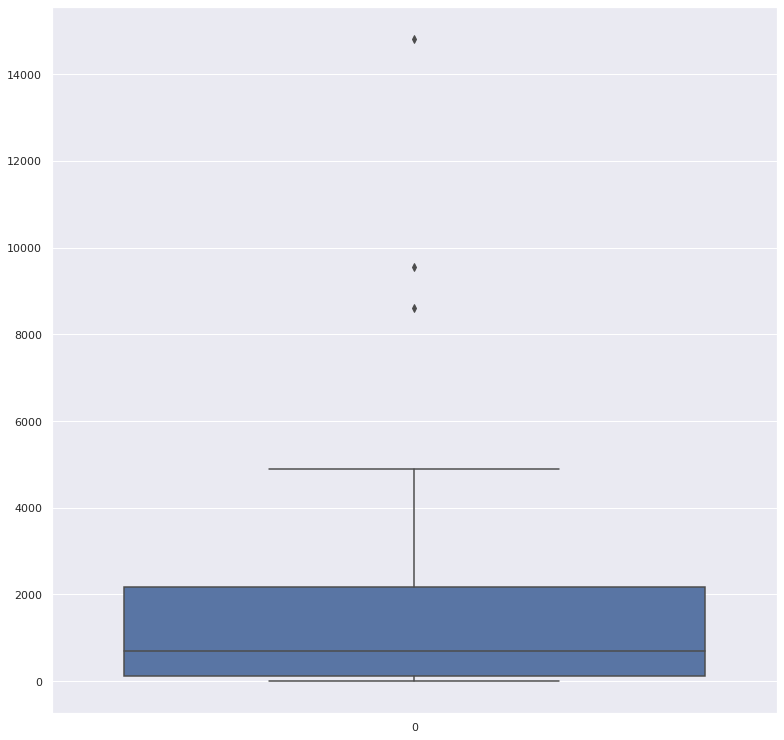

In [125]:
sns.set(rc={"figure.figsize":(13, 13)})
sns.boxplot(data=distance_stat['count'])

/usr/local/jupyterhub/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

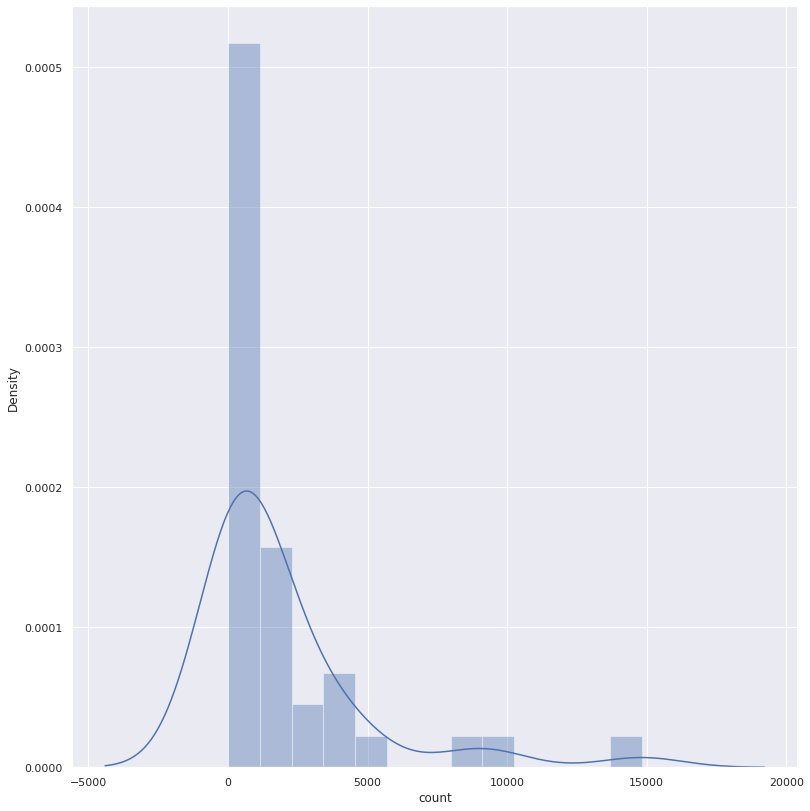

In [126]:
sns.set(rc={"figure.figsize":(13, 14)})
sns.distplot(distance_stat['count'])

In [116]:
# Here for the 39 participants (count) there is the descriptive statistics of each column with the sum of taps
descriptive_stats_column = summed_taps_part.describe().T

In [117]:
descriptive_stats_column

,count,mean,std,min,25%,50%,75%,max
maps_taps,39.0,4696.282051,18432.813967,0.0,50.0,316.0,1472.5,113969.0
travel_taps,39.0,3915.871795,6053.662420,0.0,61.5,959.0,4213.0,20213.0
productivity_taps,39.0,10891.743590,43217.181137,0.0,81.5,1077.0,5008.5,269177.0
personalisation_taps,39.0,3491.923077,6504.678747,0.0,0.0,656.0,3234.0,30943.0
tools_taps,39.0,8842.000000,25315.457229,0.0,159.5,753.0,3806.5,144601.0
communication_taps,39.0,63591.769231,97193.720203,17.0,2663.0,24487.0,72759.5,368309.0
news_magazines_taps,39.0,8434.615385,34446.621697,0.0,0.0,1.0,1245.0,208976.0
social_taps,39.0,25293.000000,54429.242648,0.0,43.5,2194.0,17397.0,233288.0
shopping_taps,39.0,660.179487,1127.735992,0.0,0.0,99.0,948.0,4504.0
video_players_taps,39.0,4296.282051,11766.696348,0.0,0.0,432.0,3189.0,67592.0


In [118]:
descriptive_stats_column['mean'].describe()

count       23.000000
mean      7833.527313
std      14245.789071
min        406.051282
25%        959.333333
50%       2107.000000
75%       6571.820513
max      63591.769231
Name: mean, dtype: float64

In [97]:
#c =final_data.groupby(by='index').describe().T

In [111]:
# groupby Index and distances counting tapping of different categories
#df.groupby(['A','C'])['B'].sum()
new_data = final_data.groupby(['home_distance']).count()
new_data.drop(columns=['index'])

,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,video_players_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
home_distance,,,,,,,,,,,,,,,,,,,,,
0.000000,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
0.000022,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.000050,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.000060,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.000075,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854.430880,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9854.432177,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9854.436026,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


<AxesSubplot:>

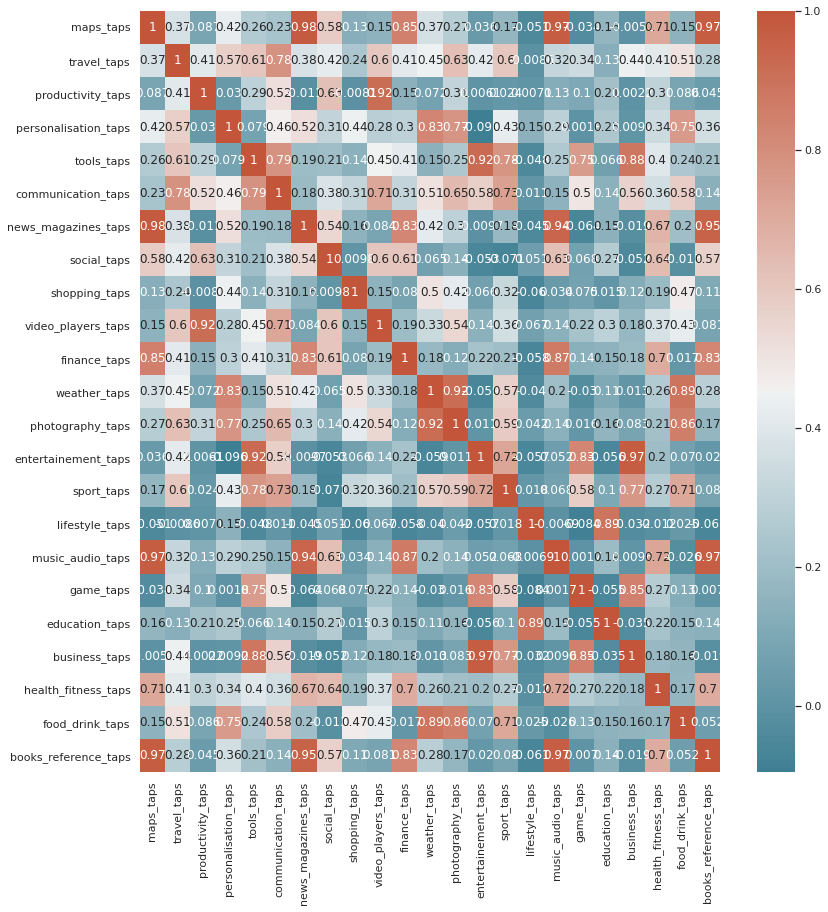

In [102]:
# calculate correlation matrix
corr = summed_taps_part.corr()# plot the heatmap
sns.set(rc={"figure.figsize":(13, 14)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

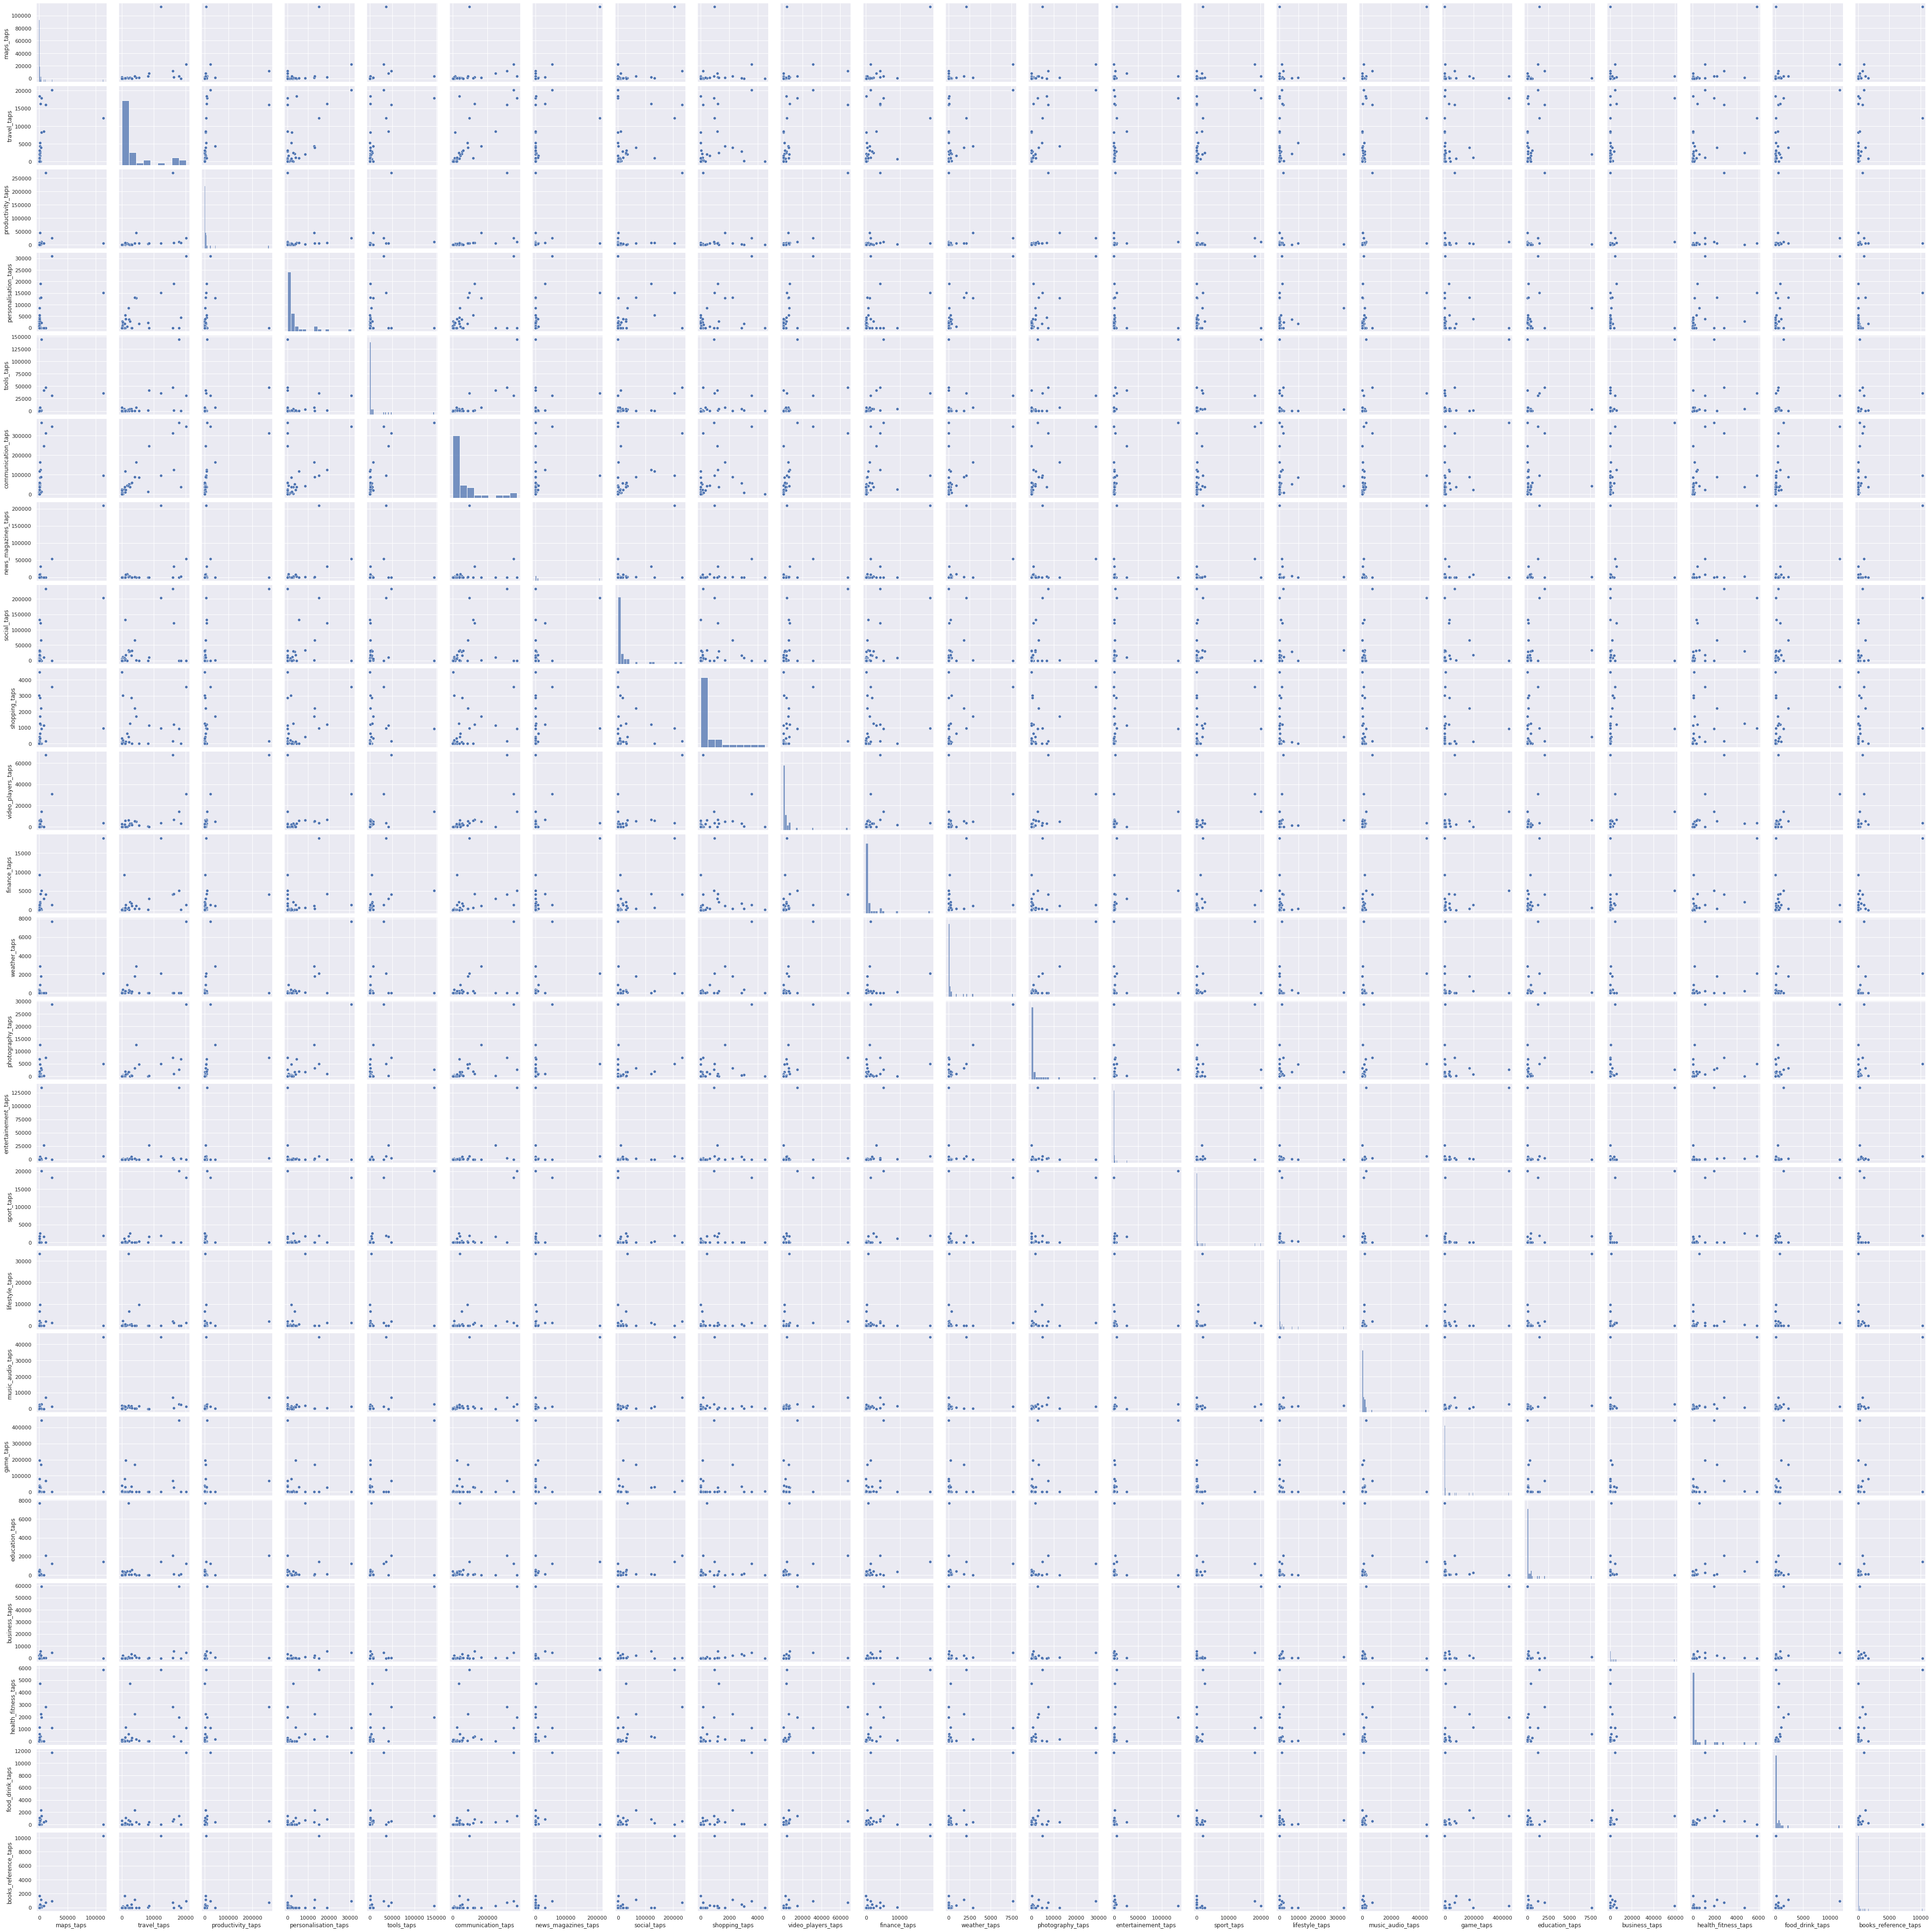

In [119]:
sns.pairplot(summed_taps_part)

In [129]:
# Check distribution of variable home_distance
k2, p = stats.normaltest(distance_stat['count'])
print (p)

#Check normal distribution for all category columns # normality assumed if p[x]< 0.05
k2, p = stats.normaltest(without_ind)
print (p)

8.511070707743062e-10
[2.63505356e-19 2.10241287e-04 1.31034840e-19 1.36387825e-09
 8.18491552e-16 1.26777905e-06 1.13177584e-18 1.04026524e-09
 3.07644388e-06 3.15327299e-16 1.85475661e-14 4.59673843e-16
 6.50530828e-15 1.50059384e-19 3.13946780e-14 4.35146867e-18
 1.16353909e-19 8.91709761e-15 5.58274785e-18 6.32416525e-20
 2.46109450e-10 5.29877047e-19 2.38511854e-19]


,index,maps_taps,travel_taps,productivity_taps,personalisation_taps,tools_taps,communication_taps,news_magazines_taps,social_taps,shopping_taps,...,entertainement_taps,sport_taps,lifestyle_taps,music_audio_taps,game_taps,education_taps,business_taps,health_fitness_taps,food_drink_taps,books_reference_taps
0,138e00cbba7d2ffd4529a40085503e72a50f28eb,9,70,5,2823,55,2858,1,1640,0,...,0,0,0,0,5833,5,6,0,0,0
1,138e0597ea9b57894f38aee74a16a0186c1528eb,261,53,0,0,180,24487,0,4812,12,...,356,211,0,1932,38584,40,0,9,0,0
2,138e0de80f19742f475087d5bab348345f4328eb,44,219,702,1744,1098,7484,353,8793,3034,...,0,0,1,185,0,166,2345,88,54,197
3,138e0f9168ca102c4e0eb46b4815c94cc9cf28eb,1462,4407,44829,12919,7285,164825,0,1127,1704,...,0,46,14,347,0,0,535,156,405,1
4,138e16263a067d1a45c0a6c0a8e494e939f828eb,318,2217,454,3610,806,51203,3418,29390,104,...,242,428,6520,1336,0,56,108,34,24,0
5,138e19840f04b4e548058277ba44ff1e192a28eb,33,0,20,0,0,2468,133,940,99,...,0,53,0,0,461,0,0,0,0,11
6,138e1b37bd14340542c5a02724539c59c99e28eb,134,255,197,2378,753,9026,1697,11882,120,...,1289,36,2296,748,198,20,464,19,0,0
7,138e35ce1a3df38d438bbac4a7d76b8a25e528eb,1023,1669,4842,656,719,44259,9500,0,642,...,1117,0,318,726,0,392,38,57,61,315
8,138e364b7d0241a44f25bc054d05f7c3e16828eb,113969,12303,6119,15181,36091,95742,208976,204345,956,...,5862,1964,17,44517,0,1416,13,5855,45,10275
9,138e4270a54e586c43d09b9981d0b85cd56e28eb,3561,17953,10777,0,144601,368309,45,4,940,...,134441,20124,17,2800,444073,0,59270,1956,1441,238


In [137]:
new_df_corr = summed_taps_part.join(distance_stat['count'], on='index').rename(columns={'count':'distance_count'})

<AxesSubplot:>

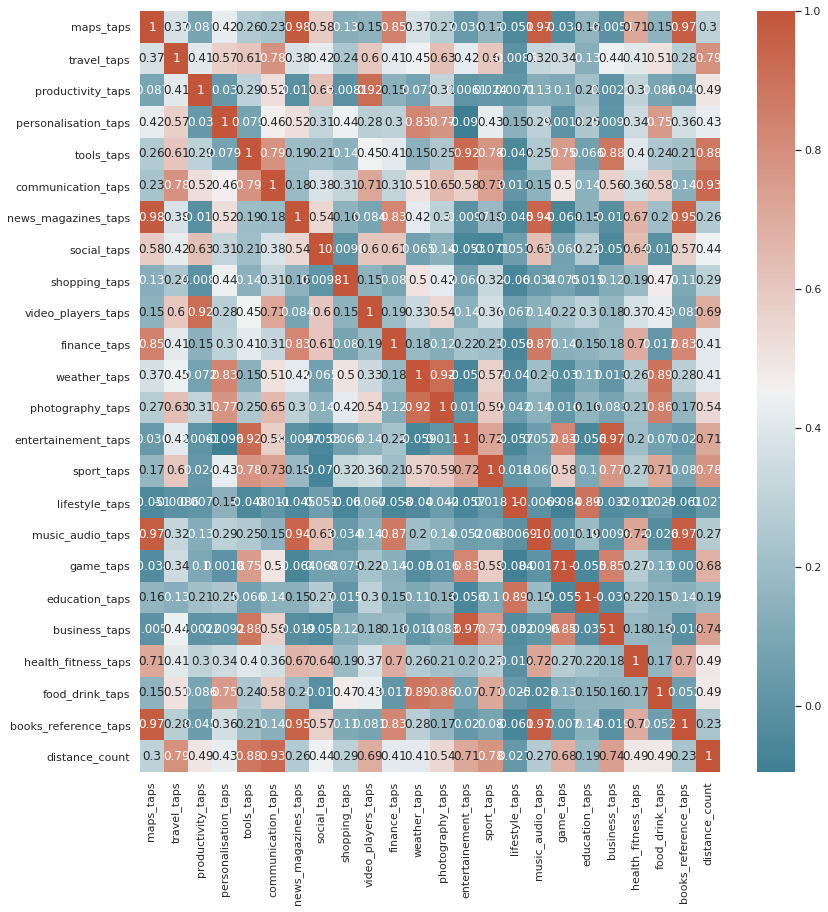

In [138]:
corr = new_df_corr.corr()# plot the heatmap
sns.set(rc={"figure.figsize":(13, 14)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [139]:
# Interesting corr fpr sport and travel with the distance in number of distance count 